# Project on Traffic accidents in Kenya - ICS2405
Project is to be able to build a model that would classify how risky a road is

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = "/content/drive/MyDrive/Datasets/ICS2405-datasets/TRAFFIC ACCIDENTS DATA.xlsx"

try:
  df = pd.read_excel(file_path)
  print(df.head()) # Display the first few rows of the dataframe to confirm
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

        Date Accident Spot      Area     County                Road/ Highway  \
0 2023-08-08         Sobea     Sobea     Nakuru       Nakuru-Eldoret Highway   
1 2023-08-07    Maai-Mahiu  Naivasha     Nakuru  Maai-Mahiu Naivasha Highway   
2 2023-07-25       Ntulele   Ntulele      Narok         Narok Mai Mahiu road   
3 2022-12-02         Suswa     Suswa      Narok         Narok Mai Mahiu road   
4 2022-12-01        Mutira    Mutira  Kirinyaga       Kerugoya-Karatina Road   

       Brief Accident Details/Cause                Victims  \
0                 Head on Collision             Passengers   
1  vehicle and motorcycle collision             Passengers   
2                 Head on Collision      Drivers/Occupants   
3                 Head on Collision  Driver and passengers   
4                          Run over             Pedestrian   

  Total people confirmed dead Time of the Accidents Weather conditions  
0                           4               4.30 pm                NaN  


In [ ]:
df.columns

Index(['Date', 'Accident Spot', 'Area', 'County', 'Road/ Highway',
       'Brief Accident Details/Cause', 'Victims',
       'Total people confirmed dead', 'Time of the Accidents',
       'Weather conditions'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          80 non-null     datetime64[ns]
 1   Accident Spot                 81 non-null     object        
 2   Area                          81 non-null     object        
 3   County                        81 non-null     object        
 4   Road/ Highway                 80 non-null     object        
 5   Brief Accident Details/Cause  79 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   72 non-null     object        
 8   Time of the Accidents         25 non-null     object        
 9   Weather conditions            1 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 6.5+ KB


In [ ]:

rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 81
Number of columns: 10


## Data cleaning
- Column _weather conditions_ just has 1 data point hence can be _removed_

In [ ]:
if 'Weather conditions' in df.columns:
    df = df.drop('Weather conditions', axis=1)
    print("Column 'Weather conditions' dropped successfully.")
else:
    print("Column 'Weather conditions' not found in the DataFrame.")

Column 'Weather conditions' dropped successfully.


In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN
...,...,...,...,...,...,...,...,...,...
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,Passengers,1,NaN
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,Passengers,1,11.00 pm
78,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,Passengers,1,NaN
79,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,Passengers,4,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          80 non-null     datetime64[ns]
 1   Accident Spot                 81 non-null     object        
 2   Area                          81 non-null     object        
 3   County                        81 non-null     object        
 4   Road/ Highway                 80 non-null     object        
 5   Brief Accident Details/Cause  79 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   72 non-null     object        
 8   Time of the Accidents         25 non-null     object        
dtypes: datetime64[ns](1), object(8)
memory usage: 5.8+ KB


### What to do with the _Total people confirmed dead_

In [ ]:
# Check for zero values in 'Total people confirmed dead'
zero_count = (df['Total people confirmed dead'] == 0).sum()
print(f"Number of zero values in 'Total people confirmed dead': {zero_count}")

# Check for null values in 'Total people confirmed dead'
null_count = df['Total people confirmed dead'].isnull().sum()
print(f"Number of null values in 'Total people confirmed dead': {null_count}")

Number of zero values in 'Total people confirmed dead': 11
Number of null values in 'Total people confirmed dead': 9


In [ ]:
# check for '-' values in 'Total people confirmed dead'
dash_count = (df['Total people confirmed dead'] == '-').sum()
print(f"Number of - values in 'Total people confirmed dead': {dash_count}")

Number of - values in 'Total people confirmed dead': 1


**Conclusion**: We shouldn't be replacing the null values in zero, as from the above a null value does NOT mean that the _Total people confirmed dead_ are _0_

In [ ]:
dash_rows = df[df['Total people confirmed dead'] == '-']
dash_rows

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
44,2023-04-02,Masaba,Masaba,Kisii,Kisii Keroka Road,NaN,NaN,-,NaN


In [ ]:
# Remove rows where 'Total people confirmed dead' is '-'
df = df[df['Total people confirmed dead'] != '-']

# Verify the change (optional)
dash_count_after = (df['Total people confirmed dead'] == '-').sum()
print(f"Number of '-' values after removal: {dash_count_after}")

Number of '-' values after removal: 0


Removed the row with _'-' value in **Total people confirmed dead**_ since it is just ONE row, and this row has null values for many other columns:_Brief Accident details, Victims, Time of accidents_

In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN
...,...,...,...,...,...,...,...,...,...
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,Passengers,1,NaN
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,Passengers,1,11.00 pm
78,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,Passengers,1,NaN
79,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,Passengers,4,NaN


### Distribution of the Dead people confirmed in the accident

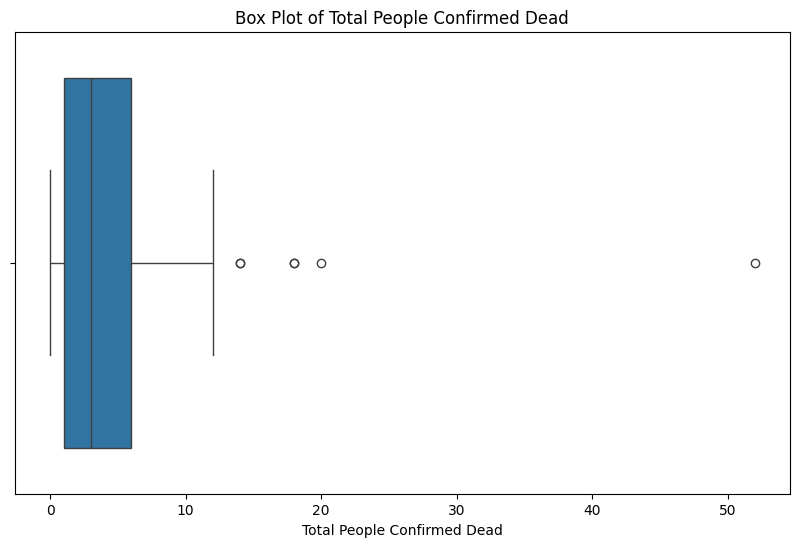

In [ ]:

# Convert 'Total people confirmed dead' column to numeric, coercing errors to NaN
Dead_people = pd.to_numeric(df['Total people confirmed dead'], errors='coerce')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Dead_people)
plt.title('Box Plot of Total People Confirmed Dead')
plt.xlabel('Total People Confirmed Dead')
plt.show()

### The outliers

In [ ]:

# Calculate Q1, Q3, and IQR
Q1 = Dead_people.quantile(0.25)
Q3 = Dead_people.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Dead_people[(Dead_people < lower_bound) | (Dead_people > upper_bound)]

print("Outliers:")
outliers

Outliers:


,Total people confirmed dead
18,52.0
29,20.0
34,14.0
62,18.0
67,14.0
73,18.0


In [ ]:
max(Dead_people)

52.0

We do have _outliers_ in the Total People confirmed Dead, and the maximum is _52_ which is far off from the normal distribution of values of this column
thus not appropriate to use 'mean' to replace null values but rather use the Median which is not much affected by such outliers

In [ ]:
min(Dead_people)

0.0

### Central tendencies of the _Total people confirmed dead_

In [ ]:
Dead_people

,Total people confirmed dead
0,4.0
1,1.0
2,4.0
3,3.0
4,1.0
...,...
76,1.0
77,1.0
78,1.0
79,4.0


In [ ]:

mean_dead = np.mean(Dead_people)
median_dead = Dead_people.median() # Use the pandas median method
mode_dead = Dead_people.mode()[0]  # Access the first mode value

print(f"Mean of Dead People: {mean_dead}")
print(f"Median of Dead People: {median_dead}")
print(f"Mode of Dead People: {mode_dead}")

Mean of Dead People: 4.943661971830986
Median of Dead People: 3.0
Mode of Dead People: 0.0


In [ ]:

zero_dead_rows = df[df['Total people confirmed dead'] == 0]
zero_dead_rows

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
38,2023-09-26,Ainabkoi Intersection,Ainabkoi,Uansin Gishi,Nakuru Eldoret Highway,Bus collided with a saloon car,NaN,0,NaN
45,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN
46,2023-09-08,Malili,Malili,Makueni,Mombasa - Nairobi highway,"Involved a truck, lorry and saloon car",NaN,0,4.20 pm
48,2023-08-30,Nairagie-Enkare,Narok,Narok,Narok Mai Mahiu road,Bus burst into flames,NaN,0,NaN
52,2023-07-04,Mau Summit,Kuresoi North,Nakuru,Nakuru Kericho Highway,Bus lost control and landed in a ditch,NaN,0,NaN
53,2022-04-26,Kirinyaga,Kirinyaga,Kirinyaga,Rukenya Kimunye Road,Bus overturned,NaN,0,NaN
56,2021-12-03,Tuthamba,Kirinyaga,Kirinyaga,Sagana Kagio Road,Matatu collided head on with a saloon car,NaN,0,9.00 pm
63,2023-03-31,Burguret Shopping centre,Burguret,Muranga,Naromoru Nanyuki Road,Bus overturned,Passengers,0,NaN
66,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am
68,2023-01-29,Mamboleo,Mamboleo,Kisumu,Kakamega Kisumu Road,Bus veered off the road and landed in a ditch,Passengers,0,NaN


In [ ]:

zero_dead_rows = df[df['Total people confirmed dead'] == 1]
zero_dead_rows

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN
26,2023-07-09,Ngata Bridge,Ngata,Nakuru,Nakuru Eldoret Highway,Matatu and truck head on collision,Passenger,1,10.00 pm
31,2022-07-05,Mlolongo,Mlolongo Exit,Nairobi,Nairobi Express way,Motorist crashed into toll station,Driver and other motorists,1,NaN
39,2023-08-28,Ojola,Ojola,Kisumu,Kisumu - Busia Road,"Driver tried to overtake, rammed into a traile...",Passenger,1,NaN
40,2023-08-28,Zion Area,Zion,Makueni,Mombasa - Nairobi highway,Bus hit a motorbike,Motorist,1,NaN
51,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,1,NaN
59,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,NaN,Pedestrian,1,6.30 pm
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,Passengers,1,NaN
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,Passengers,1,11.00 pm


In [ ]:
# Get the data where 'Total people confirmed dead' and 'Victims' are null
null_data = df[df['Total people confirmed dead'].isnull() & df['Victims'].isnull()]

# Display the resulting DataFrame
null_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,NaN,NaN,2.00 am
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,NaN,NaN,NaN
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN


In [ ]:

nakuru_kericho_highway_data = df[df['Road/ Highway'] == 'Nakuru Kericho Highway']
nakuru_kericho_highway_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
18,2023-06-30,Londiani,Londiani Junction,Nakuru,Nakuru Kericho Highway,Lorry failed brakes and rammed into four matat...,"Drivers,Passengers and pedestrians",52,6.30 pm
20,2021-09-01,Jubat,Londiani,Nakuru,Nakuru Kericho Highway,Matatu and truck head on collision,Passengers and driver,3,9.00 pm
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
52,2023-07-04,Mau Summit,Kuresoi North,Nakuru,Nakuru Kericho Highway,Bus lost control and landed in a ditch,NaN,0,NaN


Therefore conclude that  for the missing values in _Total People confirmed dead_ and _Victims_ in 'Nakuru Kericho Highway' we should remove them

In [ ]:

# Remove rows where 'Total people confirmed dead' and 'Victims' are null and 'Road/ Highway' is 'Nakuru Kericho Highway'
df = df[~((df['Total people confirmed dead'].isnull() & df['Victims'].isnull()) & (df['Road/ Highway'] == 'Nakuru Kericho Highway'))]

In [ ]:
# Get the data where 'Total people confirmed dead' and 'Victims' are null
null_data = df[df['Total people confirmed dead'].isnull() & df['Victims'].isnull()]

# Display the resulting DataFrame
null_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,NaN,NaN,2.00 am
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,NaN,NaN,NaN


In [ ]:
meru_embu_road_data = df[df['Road/ Highway'] == 'Meru Embu Road']
meru_embu_road_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,Passengers,6,NaN
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,Passengers,4,NaN
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,Passengers,5,NaN
10,2021-09-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,Passengers,4,NaN
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,NaN,NaN,2.00 am
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,NaN,NaN,NaN


Therefore conclude that  for the missing values in _Total People confirmed dead_ and _Victims_ in 'Meru Embu Road' we should remove them

In [ ]:

# Remove rows where 'Total people confirmed dead' and 'Victims' are null and 'Road/ Highway' is 'Meru Embu Road'
df = df[~((df['Total people confirmed dead'].isnull() & df['Victims'].isnull()) & (df['Road/ Highway'] == 'Meru Embu Road'))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 80
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          75 non-null     datetime64[ns]
 1   Accident Spot                 76 non-null     object        
 2   Area                          76 non-null     object        
 3   County                        76 non-null     object        
 4   Road/ Highway                 75 non-null     object        
 5   Brief Accident Details/Cause  75 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   71 non-null     object        
 8   Time of the Accidents         24 non-null     object        
dtypes: datetime64[ns](1), object(8)
memory usage: 5.9+ KB


In [ ]:
# Get the data where 'Total people confirmed dead' and 'Victims' are null
null_data = df[df['Total people confirmed dead'].isnull() & df['Victims'].isnull()]

# Display the resulting DataFrame
null_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents


In [ ]:

df.isnull().sum()


,0
Date,1
Accident Spot,0
Area,0
County,0
Road/ Highway,1
Brief Accident Details/Cause,1
Victims,13
Total people confirmed dead,5
Time of the Accidents,52


In [ ]:
# Get the data where  'Victims' only are null
null_data = df[df['Victims'].isnull()]

# Display the resulting DataFrame
null_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
28,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,NaN,7,NaN
30,2023-05-15,Sachangwan,Sachangwan,Bomet,Nakuru Eldoret Highway,"Matatu hit a bump, veered off the road and lan...",NaN,5,2.00 am
37,2023-09-27,Laisamis,Laisamis,Isiolo,Marsabit Isiolo Highway,Vehicle veered off rhe road after tyre burst,NaN,2,NaN
38,2023-09-26,Ainabkoi Intersection,Ainabkoi,Uansin Gishi,Nakuru Eldoret Highway,Bus collided with a saloon car,NaN,0,NaN
43,2023-04-16,Josa,Mwatate,Taita Taveta,Mombasa - Nairobi highway,Head on Collision,NaN,10,NaN
45,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN
46,2023-09-08,Malili,Malili,Makueni,Mombasa - Nairobi highway,"Involved a truck, lorry and saloon car",NaN,0,4.20 pm
48,2023-08-30,Nairagie-Enkare,Narok,Narok,Narok Mai Mahiu road,Bus burst into flames,NaN,0,NaN
52,2023-07-04,Mau Summit,Kuresoi North,Nakuru,Nakuru Kericho Highway,Bus lost control and landed in a ditch,NaN,0,NaN
53,2022-04-26,Kirinyaga,Kirinyaga,Kirinyaga,Rukenya Kimunye Road,Bus overturned,NaN,0,NaN


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Isinya Kiserian Road']

In [ ]:
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
28,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,NaN,7,NaN


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Narok Mai Mahiu road']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm
48,2023-08-30,Nairagie-Enkare,Narok,Narok,Narok Mai Mahiu road,Bus burst into flames,NaN,0,NaN
50,2023-07-25,Ntulele,Narok,Narok,Narok Mai Mahiu road,truck collided head on with another truck,Passengers,3,NaN
51,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,1,NaN


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Rukenya Kimunye Road']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
53,2022-04-26,Kirinyaga,Kirinyaga,Kirinyaga,Rukenya Kimunye Road,Bus overturned,NaN,0,NaN


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Sagana Kagio Road']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
56,2021-12-03,Tuthamba,Kirinyaga,Kirinyaga,Sagana Kagio Road,Matatu collided head on with a saloon car,NaN,0,9.00 pm


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Marsabit Isiolo Highway']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
37,2023-09-27,Laisamis,Laisamis,Isiolo,Marsabit Isiolo Highway,Vehicle veered off rhe road after tyre burst,NaN,2,NaN


Based on the above we should NOT just remove data points where values of _Victims_ is _null_ since we would lose the info of some certain roads completely

In [ ]:
# Get the data where 'Total people confirmed dead' only are null
null_data = df[df['Total people confirmed dead'].isnull()]

# Display the resulting DataFrame
null_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,Rider,NaN,NaN
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,Passengers and driver,NaN,NaN
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,Passengers and drivers,NaN,NaN
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,Passengers,NaN,NaN
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,Passangers and driver,NaN,NaN


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Bomet - Sotik highway']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
19,2022-09-21,Sachangwan,Sachangwan,Bomet,Bomet - Sotik highway,Matatu collided with a tractor,Driver and passengers,4,NaN
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,Rider,NaN,NaN


In [ ]:
temp_data = df[df['County'] == 'Kisumu']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,Passengers and driver,NaN,NaN
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,Passengers and drivers,NaN,NaN
39,2023-08-28,Ojola,Ojola,Kisumu,Kisumu - Busia Road,"Driver tried to overtake, rammed into a traile...",Passenger,1,NaN
68,2023-01-29,Mamboleo,Mamboleo,Kisumu,Kakamega Kisumu Road,Bus veered off the road and landed in a ditch,Passengers,0,NaN
71,2022-08-30,Coptic Round,Coptic,Kisumu,Kisumu Kakamega road,Truck lost control and overturned,Pedestrians,3,NaN
72,2022-07-16,Koru,Koru,Kisumu,NaN,Bus rolled as it tried avoiding collision with...,Passengers,0,2.00 pm


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Kisumu - Busia Road']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,Passengers and drivers,NaN,NaN
39,2023-08-28,Ojola,Ojola,Kisumu,Kisumu - Busia Road,"Driver tried to overtake, rammed into a traile...",Passenger,1,NaN


In [ ]:
temp_data = df[df['Area'] == 'Greensteads']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,Passengers,NaN,NaN


In [ ]:
temp_data = df[df['Road/ Highway'] == 'Narok road']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,Passangers and driver,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 80
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          75 non-null     datetime64[ns]
 1   Accident Spot                 76 non-null     object        
 2   Area                          76 non-null     object        
 3   County                        76 non-null     object        
 4   Road/ Highway                 75 non-null     object        
 5   Brief Accident Details/Cause  75 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   71 non-null     object        
 8   Time of the Accidents         24 non-null     object        
dtypes: datetime64[ns](1), object(8)
memory usage: 5.9+ KB


In [ ]:
df.isnull().sum()

,0
Date,1
Accident Spot,0
Area,0
County,0
Road/ Highway,1
Brief Accident Details/Cause,1
Victims,13
Total people confirmed dead,5
Time of the Accidents,52


Since rows with null values at _Road/Highway_ is just ONE, we can remove it

In [ ]:
# Remove rows where 'Road/ Highway' is null
df = df.dropna(subset=['Road/ Highway'])

In [ ]:
df.isnull().sum()

,0
Date,1
Accident Spot,0
Area,0
County,0
Road/ Highway,0
Brief Accident Details/Cause,1
Victims,13
Total people confirmed dead,5
Time of the Accidents,52


In [ ]:
null_date_data = df[df['Date'].isnull()]

# Display the rows where 'Date' is null
null_date_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
66,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am


In [ ]:
temp_data = df[df['County'] == 'Kiambu']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
42,2023-07-15,Eka Tano,Kikuyu,Kiambu,Nakuru - Nairobi highway,"Vehicle lost control, hitting other vehocles o...",Passengers,2,NaN
45,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN
66,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am


In [ ]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [ ]:
temp_data = df[df['County'] == 'Kiambu']
temp_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
38,2023-07-15,Eka Tano,Kikuyu,Kiambu,Nakuru - Nairobi highway,"Vehicle lost control, hitting other vehocles o...",Passengers,2,NaN
40,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN
61,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am


In [ ]:
# Accessing rows with index from 63 up to (but not including) 69:
selected_rows = df.iloc[56:65]
selected_rows

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
56,2023-04-01,Amabuko,Kroka Town,Kisii,Kisii Keroka Road,Matatu collided with a trailer,Passengers,5,NaN
57,2023-03-30,Kayole Bridge,Nakuru,Nakuru,Nakuru - Nairobi highway,Bus collided with a matatu,Passengers,18,NaN
58,2023-03-31,Burguret Shopping centre,Burguret,Muranga,Naromoru Nanyuki Road,Bus overturned,Passengers,0,NaN
59,2023-04-18,Maragua,Maragua,Muranga,Kenol Muranga road,Matatu collided with a lorry,Passengers,2,NaN
60,2023-08-08,Migori town,Migori Town,Migori,Migori Isibania Road,Truck failed brakes and ran into ither vehicles,Pedestrians,8,7.30 am
61,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am
62,2023-02-04,Kakwamunyen,Kakuma,Turkana,Lodwar Kakuma Road,Driver swerved to avoid on hitting a camel on ...,Passengers,14,10.00 pm
63,2023-01-29,Mamboleo,Mamboleo,Kisumu,Kakamega Kisumu Road,Bus veered off the road and landed in a ditch,Passengers,0,NaN
64,2023-01-26,Kikopey,Kikopey,Nakuru,Nakuru - Nairobi highway,A matatu rammed into a lorry,Passengers,7,NaN


all values surrounding the datapoint where _Date_ is null are recorded around the same year: _2023_, therefore we shouldnt just remove it, but rather replace the null value with _forwrad fill_

In [ ]:
# Forward fill the 'Date' column
df['Date'] = df['Date'].ffill()

In [ ]:
df.isnull().sum()

,0
Date,0
Accident Spot,0
Area,0
County,0
Road/ Highway,0
Brief Accident Details/Cause,1
Victims,13
Total people confirmed dead,5
Time of the Accidents,52


### What to do with the null value at _Brief Accident Details/Cause_

In [ ]:

null_details_data = df[df['Brief Accident Details/Cause'].isnull()]

# Display the resulting DataFrame
null_details_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
54,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,NaN,Pedestrian,1,6.30 pm


In [ ]:

nakuru_data = df[df['Road/ Highway']=='Nakuru Eldoret highway']
nakuru_data



,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
52,2023-06-24,Migaa,Mau Hills,Nakuru,Nakuru Eldoret highway,Matatu driver lost control and hit a lorry,passenger,3,NaN
53,2023-05-15,Sachangwan,Sachangwan,Nakuru,Nakuru Eldoret highway,Matatu hit a bump and veered off the road,Passengers,5,2.00 am
54,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,NaN,Pedestrian,1,6.30 pm


We could replace the _null values_ here with _backward fill_ since the values behind this rows are same with this row in terms of _Road/Highway_ and the _Brief Accident details/Cause_ for this road:_Nakuru Eldoret Highway_ are almost the same

In [ ]:

# Backfill the 'Brief Accident Details/Cause' column coz Accident details of previous datapoint would make relevance
df['Brief Accident Details/Cause'] = df['Brief Accident Details/Cause'].fillna(method='bfill')

# Verify the changes
null_details_data = df[df['Brief Accident Details/Cause'].isnull()]
print(null_details_data)
df.isnull().sum()

Empty DataFrame
Columns: [Date, Accident Spot, Area, County, Road/ Highway, Brief Accident Details/Cause, Victims, Total people confirmed dead, Time of the Accidents]
Index: []


,0
Date,0
Accident Spot,0
Area,0
County,0
Road/ Highway,0
Brief Accident Details/Cause,0
Victims,13
Total people confirmed dead,5
Time of the Accidents,52


In [ ]:

unique_victims = df['Victims'].unique()
unique_victims

array(['Passengers', 'Drivers/Occupants', 'Driver and passengers',
       'Pedestrian', 'Passengers and pedestrians ',
       'Occupants of the small vehicle ',
       'Drivers,Passengers and pedestrians', 'Passengers and driver',
       'Rider', 'Passengers and drivers', 'Passenger',
       'Passangers and driver', nan, 'Driver and other motorists ',
       'Motorist', 'Pedestrians', 'passengers', 'passenger'], dtype=object)

In [ ]:
passenger_victims = df[df['Victims']=='Passenger']
passenger_victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
23,2023-07-09,Ngata Bridge,Ngata,Nakuru,Nakuru Eldoret Highway,Matatu and truck head on collision,Passenger,1,10.00 pm
35,2023-08-28,Ojola,Ojola,Kisumu,Kisumu - Busia Road,"Driver tried to overtake, rammed into a traile...",Passenger,1,NaN


In [ ]:
passenger_victims = df[df['Victims']=='passenger']
passenger_victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
52,2023-06-24,Migaa,Mau Hills,Nakuru,Nakuru Eldoret highway,Matatu driver lost control and hit a lorry,passenger,3,NaN


From the above we can conclude that "passenger" as value in _Victims_ means "passengers"

In [ ]:

# Replace 'passenger' with 'passengers' in the 'Victims' column
df['Victims'] = df['Victims'].replace('passenger', 'passengers')

# Verify the changes
passenger_victims = df[df['Victims'] == 'passenger']
passenger_victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents


In [ ]:
df['Victims'].unique()

array(['Passengers', 'Drivers/Occupants', 'Driver and passengers',
       'Pedestrian', 'Passengers and pedestrians ',
       'Occupants of the small vehicle ',
       'Drivers,Passengers and pedestrians', 'Passengers and driver',
       'Rider', 'Passengers and drivers', 'Passenger',
       'Passangers and driver', nan, 'Driver and other motorists ',
       'Motorist', 'Pedestrians', 'passengers'], dtype=object)

In [ ]:
passenger_victims = df[df['Victims']=='Pedestrian']
passenger_victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN
54,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,Matatu collided with a lorry,Pedestrian,1,6.30 pm


From the above we can see that even when Victims are just ONE eg: _passenger or a pedestrian_ but deaths confirmed are still not 0 rather it is 1,meaning number of victims was equal to deaths confirmed, therefore this column alone cannot be used to show the danger levels of a road

In [ ]:
victims = df[df['Victims']=='Occupants of the small vehicle ']
victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
12,2023-08-20,Naivasha,Marula Farm,Naivasha,Nairobi - Nakuru highway,Personal vehicle rammed onto an oncoming bus,Occupants of the small vehicle,2,2.00 am
42,2023-08-20,Naivasha,Marula Farm,Naivasha,Nairobi - Nakuru highway,Personal vehicle rammed onto an oncoming bus,Occupants of the small vehicle,3,2.00 am


In [ ]:
victims = df[df['Victims']=='Drivers/Occupants']
victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN


In [ ]:

# Replace specific values in the 'Victims' column
df['Victims'] = df['Victims'].replace(['Drivers/Occupants', 'Occupants of the small vehicle '], 'Driver and passengers')
df['Victims'].unique()

array(['Passengers', 'Driver and passengers', 'Pedestrian',
       'Passengers and pedestrians ',
       'Drivers,Passengers and pedestrians', 'Passengers and driver',
       'Rider', 'Passengers and drivers', 'Passenger',
       'Passangers and driver', nan, 'Driver and other motorists ',
       'Motorist', 'Pedestrians', 'passengers'], dtype=object)

In [ ]:
victims = df[df['Victims']=='Passengers and drivers']
victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
21,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,Passengers and drivers,NaN,NaN
31,2023-03-30,Naivasha,Kayole Naivasha,Nakuru,Nakuru - Nairobi highway,Bus collided with matatu,Passengers and drivers,14,1.00 pm


In [ ]:
victims = df[df['Victims']=='Rider']
victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
19,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,Rider,NaN,NaN


In [ ]:
victims = df[df['Victims']=='Motorist']
victims

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
36,2023-08-28,Zion Area,Zion,Makueni,Mombasa - Nairobi highway,Bus hit a motorbike,Motorist,1,NaN


_Rider_ and _Motorist_ mean the same thing

In [ ]:

# Replace 'Rider' with 'Motorist' in the 'Victims' column
df['Victims'] = df['Victims'].replace('Rider', 'Motorist')

# Verify the changes
victims = df[df['Victims'] == 'Rider']
print(victims)
victims = df[df['Victims'] == 'Motorist']
victims

Empty DataFrame
Columns: [Date, Accident Spot, Area, County, Road/ Highway, Brief Accident Details/Cause, Victims, Total people confirmed dead, Time of the Accidents]
Index: []


,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
19,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,Motorist,NaN,NaN
36,2023-08-28,Zion Area,Zion,Makueni,Mombasa - Nairobi highway,Bus hit a motorbike,Motorist,1,NaN


In [ ]:

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,4,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,Passengers,1,NaN
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,Passengers,1,11.00 pm
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,Passengers,1,NaN
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,Passengers,4,NaN


In [ ]:
df['Victims'].unique()

array(['Passengers', 'Driver and passengers', 'Pedestrian',
       'Passengers and pedestrians ',
       'Drivers,Passengers and pedestrians', 'Passengers and driver',
       'Motorist', 'Passengers and drivers', 'Passenger',
       'Passangers and driver', nan, 'Driver and other motorists ',
       'Pedestrians', 'passengers'], dtype=object)

In [ ]:

# Replace specific values in the 'Victims' column
df['Victims'] = df['Victims'].replace(['Driver and passengers', 'Passengers and driver', 'Passangers and driver'], 'Driver and passengers')

In [ ]:
df['Victims'].unique()

array(['Passengers', 'Driver and passengers', 'Pedestrian',
       'Passengers and pedestrians ',
       'Drivers,Passengers and pedestrians', 'Motorist',
       'Passengers and drivers', 'Passenger', nan,
       'Driver and other motorists ', 'Pedestrians', 'passengers'],
      dtype=object)

In [ ]:
df[df['Victims'] == 'Passengers and drivers']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
21,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,Passengers and drivers,NaN,NaN
31,2023-03-30,Naivasha,Kayole Naivasha,Nakuru,Nakuru - Nairobi highway,Bus collided with matatu,Passengers and drivers,14,1.00 pm


In [ ]:

# Apply lowercasing and whitespace(start) removal to the 'Victims' column
df['Victims'] = df['Victims'].str.lower().str.lstrip()

In [ ]:

# whitespace(end) removal to the 'Victims' column
df['Victims'] = df['Victims'].str.lower().str.rstrip()

In [ ]:
df['Victims'].unique()

array(['passengers', 'driver and passengers', 'pedestrian',
       'passengers and pedestrians', 'drivers,passengers and pedestrians',
       'motorist', 'passengers and drivers', 'passenger', nan,
       'driver and other motorists', 'pedestrians'], dtype=object)

In [ ]:
len(df['Victims'].unique())

11

In [ ]:
victims_str = df['Victims'].unique()
victims_str

array(['passengers', 'driver and passengers', 'pedestrian',
       'passengers and pedestrians', 'drivers,passengers and pedestrians',
       'motorist', 'passengers and drivers', 'passenger', nan,
       'driver and other motorists', 'pedestrians'], dtype=object)

In [ ]:
df.isnull().sum()

,0
Date,0
Accident Spot,0
Area,0
County,0
Road/ Highway,0
Brief Accident Details/Cause,0
Victims,13
Total people confirmed dead,5
Time of the Accidents,52


In [ ]:
df['Victims'].unique()

array(['passengers', 'driver and passengers', 'pedestrian',
       'passengers and pedestrians', 'drivers,passengers and pedestrians',
       'motorist', 'passengers and drivers', 'passenger', nan,
       'driver and other motorists', 'pedestrians'], dtype=object)

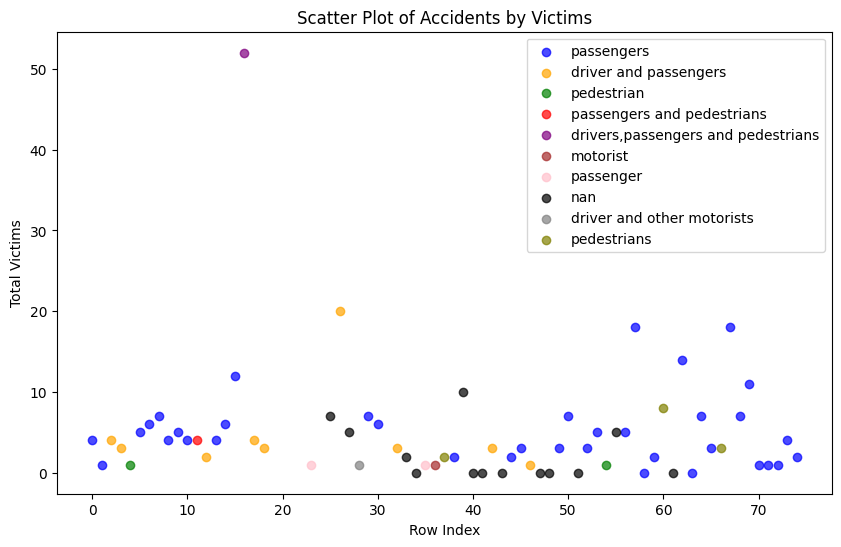

In [ ]:
# Distribution of Victims

# Define colors for each category, explicitly including NaN
colors = {'passengers': 'blue', 'driver and passengers': 'orange', 'pedestrian': 'green',
          'passengers and pedestrians': 'red', 'drivers,passengers and pedestrians': 'purple',
          'motorist': 'brown', 'passenger': 'pink', 'nan': 'black',
          'driver and other motorists': 'gray', 'pedestrians': 'olive'}

plt.figure(figsize=(10, 6))
# Iterate through categories and plot
for category, color in colors.items():
    # Handle NaN values correctly
    if category == 'nan':
        subset = df[df['Victims'].isnull()]
    else:
        subset = df[df['Victims'] == category]
    plt.scatter(subset.index, subset['Total people confirmed dead'], label=category, color=color, alpha=0.7)

plt.title('Scatter Plot of Accidents by Victims')
plt.xlabel('Row Index')
plt.ylabel('Total Victims')
plt.legend()
plt.show()

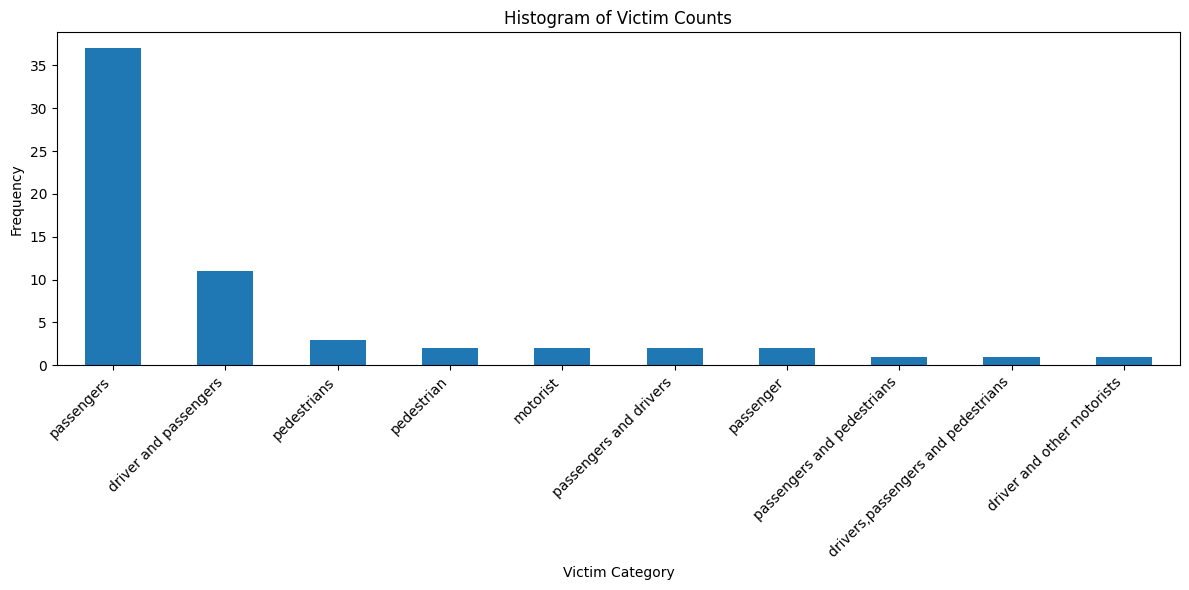

In [ ]:
victim_counts = df['Victims'].value_counts()

plt.figure(figsize=(12, 6))
victim_counts.plot(kind='bar')
plt.title('Histogram of Victim Counts')
plt.xlabel('Victim Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:

# Get the data where 'Victims' are null
null_victims_data = df[df['Victims'].isnull()]

# Display the resulting DataFrame
null_victims_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
25,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,NaN,7,NaN
27,2023-05-15,Sachangwan,Sachangwan,Bomet,Nakuru Eldoret Highway,"Matatu hit a bump, veered off the road and lan...",NaN,5,2.00 am
33,2023-09-27,Laisamis,Laisamis,Isiolo,Marsabit Isiolo Highway,Vehicle veered off rhe road after tyre burst,NaN,2,NaN
34,2023-09-26,Ainabkoi Intersection,Ainabkoi,Uansin Gishi,Nakuru Eldoret Highway,Bus collided with a saloon car,NaN,0,NaN
39,2023-04-16,Josa,Mwatate,Taita Taveta,Mombasa - Nairobi highway,Head on Collision,NaN,10,NaN
40,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN
41,2023-09-08,Malili,Malili,Makueni,Mombasa - Nairobi highway,"Involved a truck, lorry and saloon car",NaN,0,4.20 pm
43,2023-08-30,Nairagie-Enkare,Narok,Narok,Narok Mai Mahiu road,Bus burst into flames,NaN,0,NaN
47,2023-07-04,Mau Summit,Kuresoi North,Nakuru,Nakuru Kericho Highway,Bus lost control and landed in a ditch,NaN,0,NaN
48,2022-04-26,Kirinyaga,Kirinyaga,Kirinyaga,Rukenya Kimunye Road,Bus overturned,NaN,0,NaN


Neither bfill nor ffill is suitable based on the plot of distribution shown above, and since its categorical we do not have 'Mean' or 'Median' thus just replace with Mode

In [ ]:

# Find the mode (most frequent value) in the 'Victims' column
mode_victims = df['Victims'].mode()[0]

print(f"Mode of 'Victims': {mode_victims}")

Mode of 'Victims': passengers


In [ ]:
# Replace null values in the 'Victims' column with the mode
df['Victims'].fillna(mode_victims, inplace=True)

In [ ]:
df.isnull().sum()

,0
Date,0
Accident Spot,0
Area,0
County,0
Road/ Highway,0
Brief Accident Details/Cause,0
Victims,0
Total people confirmed dead,5
Time of the Accidents,52


In [ ]:

# Get the data where 'Total people confirmed dead' are null
null_total_dead_data = df[df['Total people confirmed dead'].isnull()]

# Display the resulting DataFrame
null_total_dead_data

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
19,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,motorist,NaN,NaN
20,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,NaN,NaN
21,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,passengers and drivers,NaN,NaN
22,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,passengers,NaN,NaN
24,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,driver and passengers,NaN,NaN


In [ ]:
df['Brief Accident Details/Cause'].unique()

array(['Head on Collision', 'vehicle and motorcycle collision',
       'Run over', 'Car hit a stationary lorry',
       'Driver lost control and swerved off the bridge',
       'Vehicle rammed into a lorry', 'Vehicle rolled into the bridge',
       'Vehicle rolled into the river',
       'Driver lost control and rammed into pillar',
       'Personal vehicle rammed onto an oncoming bus',
       'Matatu collided head on with an oncoming truck',
       'Head on collision Matatu and lorry',
       'Matatu and Lorry head on collision',
       'Lorry failed brakes and rammed into four matatus and a saloon car',
       'Matatu collided with a tractor',
       'Matatu and truck head on collision',
       'Bodaboda rider hit by matatu', 'Bus lost control and rolled',
       'Head on collision ', 'Head on collision', 'Saloom car rolled',
       'Bus lost control and rolled into a ditch',
       'shuttle rammed into a lorry',
       'Matatu hit a bump, veered off the road and landed into a ditch'

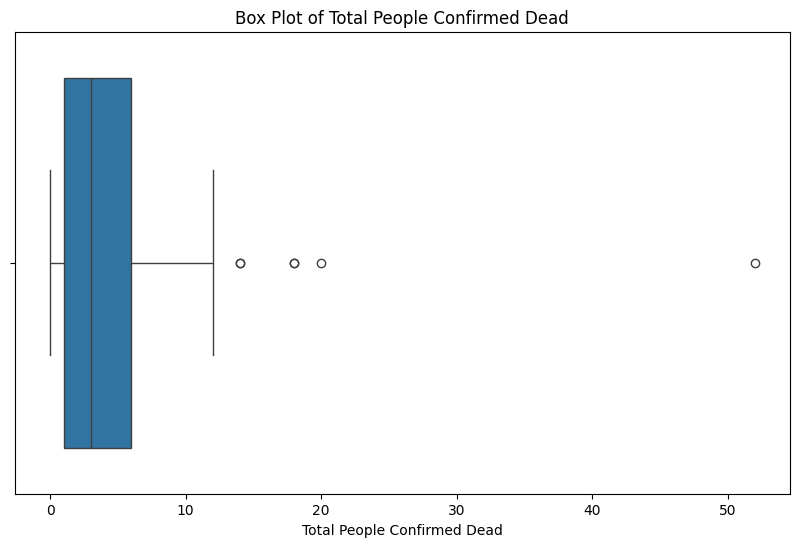

In [ ]:

# Convert 'Total people confirmed dead' column to numeric, coercing errors to NaN
Dead_people = pd.to_numeric(df['Total people confirmed dead'], errors='coerce')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Dead_people)
plt.title('Box Plot of Total People Confirmed Dead')
plt.xlabel('Total People Confirmed Dead')
plt.show()

In [ ]:
Dead_people

,Total people confirmed dead
0,4.0
1,1.0
2,4.0
3,3.0
4,1.0
...,...
70,1.0
71,1.0
72,1.0
73,4.0


Based on the above we replace the null values in _Tota people confirmed dead_ with _median_ not _mean_ since we have outliers and some of those outliers eg: the value _52_ is way ahead of the upper bound thus will affect the _mean_

In [ ]:

# Calculate the median of the 'Total people confirmed dead' column after converting to numeric
median_dead = Dead_people.median()

# Fill NaN values with the median
df['Total people confirmed dead'] = Dead_people.fillna(median_dead)

# Print some info
print(f"Median of 'Total people confirmed dead': {median_dead}")
df.info()

Median of 'Total people confirmed dead': 3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          75 non-null     datetime64[ns]
 1   Accident Spot                 75 non-null     object        
 2   Area                          75 non-null     object        
 3   County                        75 non-null     object        
 4   Road/ Highway                 75 non-null     object        
 5   Brief Accident Details/Cause  75 non-null     object        
 6   Victims                       75 non-null     object        
 7   Total people confirmed dead   75 non-null     float64       
 8   Time of the Accidents         23 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 5.4+ KB


In [ ]:
df['Time of the Accidents']

,Time of the Accidents
0,4.30 pm
1,5.50 pm
2,NaN
3,6.00 pm
4,NaN
...,...
70,NaN
71,11.00 pm
72,NaN
73,NaN


In [ ]:
df['Time of the Accidents'].unique()

array(['4.30 pm', '5.50 pm', nan, '6.00 pm', '12.30 pm', '2.00 am',
       '4.20 pm', '6.30 pm', '9.00 pm', '10.00 pm', '11.30 pm', '1.00 pm',
       '7.30 pm', '7.30 am', '10.00 am', '11.00 pm', '4.30 am'],
      dtype=object)

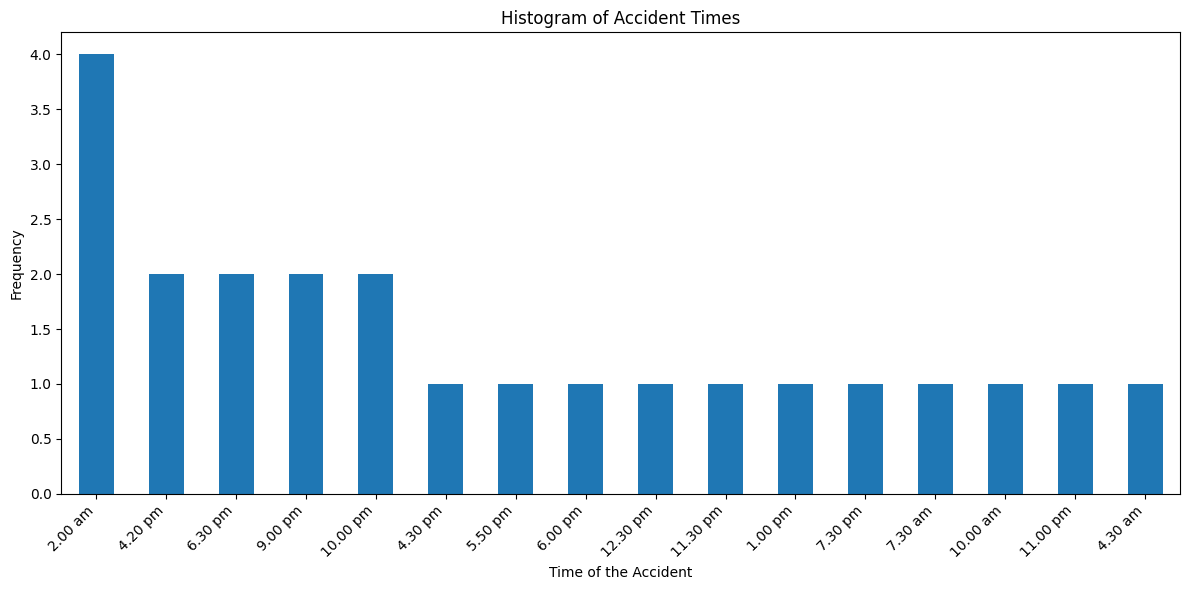

In [ ]:

time_counts = df['Time of the Accidents'].value_counts()

plt.figure(figsize=(12, 6))
time_counts.plot(kind='bar')
plt.title('Histogram of Accident Times')
plt.xlabel('Time of the Accident')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df['Time of the Accidents'].unique()

array(['4.30 pm', '5.50 pm', nan, '6.00 pm', '12.30 pm', '2.00 am',
       '4.20 pm', '6.30 pm', '9.00 pm', '10.00 pm', '11.30 pm', '1.00 pm',
       '7.30 pm', '7.30 am', '10.00 am', '11.00 pm', '4.30 am'],
      dtype=object)

In [ ]:

# Create a mapping dictionary for time replacements
time_mapping = {
    '4.30 am': 'morning',
    '10.00 am': 'morning',
    '7.30 am': 'morning',
    '12.30 pm': 'afternoon',
    '1.00 pm': 'afternoon',
    '4.30 pm': 'evening',
    '5.50 pm': 'evening',
    '6.00 pm': 'evening',
    '4.20 pm': 'evening',
    '6.30 pm': 'evening'
}

# Replace values in the 'Time of the Accidents' column based on the mapping
df['Time of the Accidents'] = df['Time of the Accidents'].replace(time_mapping)

# Replace remaining non-null values with 'night'
df['Time of the Accidents'] = df['Time of the Accidents'].where(
    df['Time of the Accidents'].isin(time_mapping.values()) | df['Time of the Accidents'].isnull(), 'night'
)

# Print the unique values in 'Time of the Accidents' column to verify
print(df['Time of the Accidents'].unique())

['evening' nan 'afternoon' 'night' 'morning']


In [ ]:
df.isnull().sum()

,0
Date,0
Accident Spot,0
Area,0
County,0
Road/ Highway,0
Brief Accident Details/Cause,0
Victims,0
Total people confirmed dead,0
Time of the Accidents,52


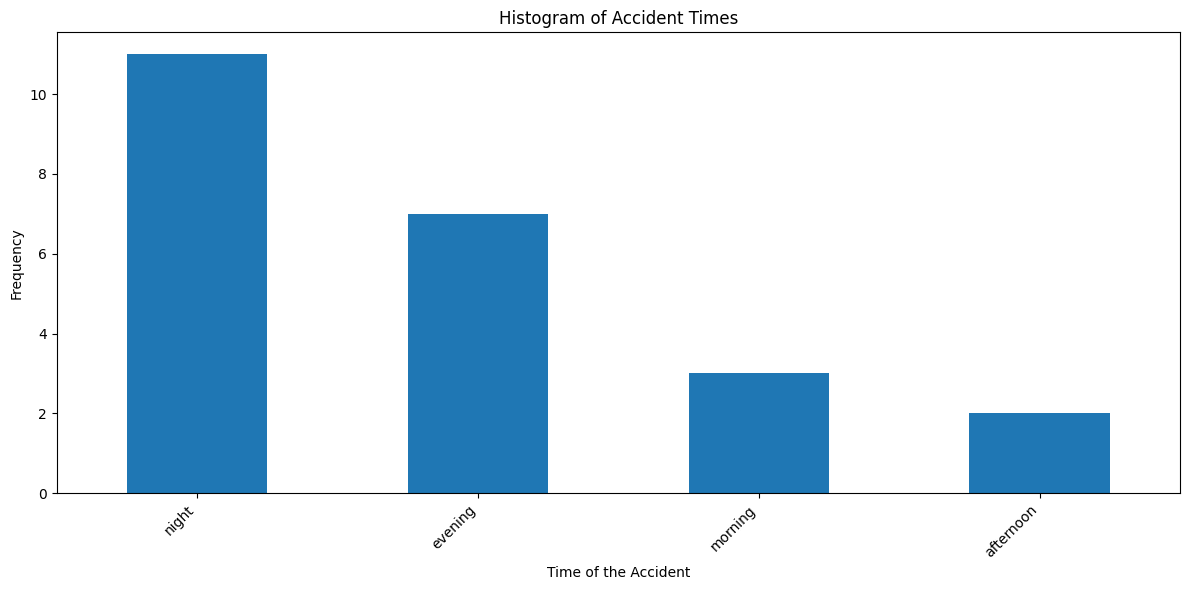

In [ ]:

time_counts = df['Time of the Accidents'].value_counts()

plt.figure(figsize=(12, 6))
time_counts.plot(kind='bar')
plt.title('Histogram of Accident Times')
plt.xlabel('Time of the Accident')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4.0,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1.0,evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,4.0,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3.0,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1.0,NaN
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,passengers,1.0,NaN
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,passengers,1.0,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,passengers,1.0,NaN
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,passengers,4.0,NaN


In [ ]:
df['Time of the Accidents'].unique()

array(['evening', nan, 'afternoon', 'night', 'morning'], dtype=object)

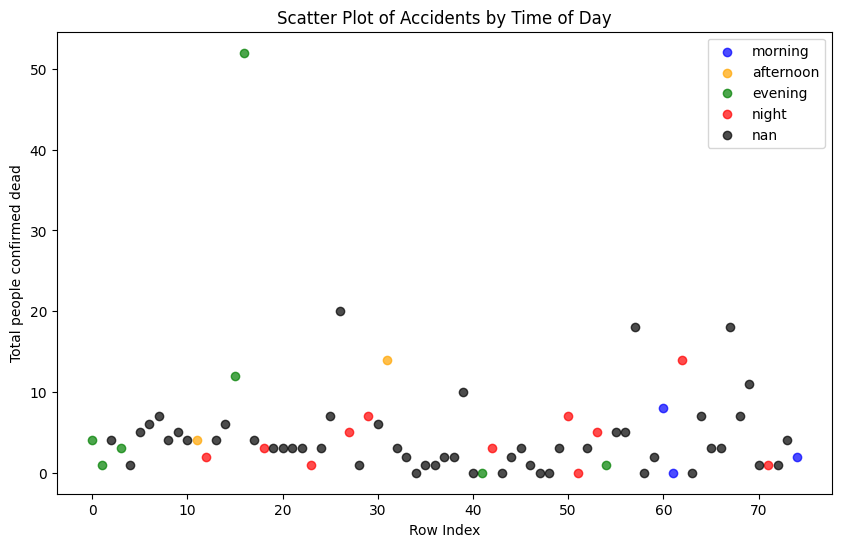

In [ ]:


plt.figure(figsize=(10, 6))
# Define colors for each category, explicitly including NaN
colors = {'morning': 'blue', 'afternoon': 'orange', 'evening': 'green', 'night': 'red', 'nan': 'black'}

# Iterate through categories and plot
for category, color in colors.items():
    # Handle NaN values correctly
    if category == 'nan':
        subset = df[df['Time of the Accidents'].isnull()]
    else:
        subset = df[df['Time of the Accidents'] == category]

    plt.scatter(subset.index, subset['Total people confirmed dead'], label=category, color=color, alpha=0.7)

plt.title('Scatter Plot of Accidents by Time of Day')
plt.xlabel('Row Index')
plt.ylabel('Total people confirmed dead')
plt.legend()
plt.show()

We do not replace with the mode as it will affect the distribution of the values too much in the column _Time of the Accidents_, but rather we go for backfill

In [ ]:
# Backfill the 'Time of the Accidents' column
df['Time of the Accidents'] = df['Time of the Accidents'].fillna(method='bfill')

In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4.0,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1.0,evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,4.0,evening
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3.0,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1.0,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,passengers,1.0,night
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,passengers,1.0,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,passengers,1.0,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,passengers,4.0,morning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          75 non-null     datetime64[ns]
 1   Accident Spot                 75 non-null     object        
 2   Area                          75 non-null     object        
 3   County                        75 non-null     object        
 4   Road/ Highway                 75 non-null     object        
 5   Brief Accident Details/Cause  75 non-null     object        
 6   Victims                       75 non-null     object        
 7   Total people confirmed dead   75 non-null     float64       
 8   Time of the Accidents         75 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 5.4+ KB


In [ ]:
df['Total people confirmed dead'].unique()

array([ 4.,  1.,  3.,  5.,  6.,  7.,  2., 12., 52., 20., 14.,  0., 10.,
       18.,  8., 11.])

In [ ]:
# Convert 'Total people confirmed dead' to integer, coercing errors to NaN
df['Total people confirmed dead'] = pd.to_numeric(df['Total people confirmed dead'], errors='coerce').astype('Int64')

In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,passengers,4,morning


In [ ]:
# Create the 'Cause' column
df['Cause'] = df['Brief Accident Details/Cause'].str.lower().str.strip()

In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Cause
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,evening,head on collision
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,evening,vehicle and motorcycle collision
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,4,evening,head on collision
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,evening,head on collision
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,afternoon,run over
...,...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,passengers,1,night,bus lost control and rolled over
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,passengers,1,night,car rammed into a trailer
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,passengers,1,morning,truck driver collided with an oncoming matatu
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,passengers,4,morning,car rammed into a lorry


In [ ]:
df['Cause'].unique()

array(['head on collision', 'vehicle and motorcycle collision',
       'run over', 'car hit a stationary lorry',
       'driver lost control and swerved off the bridge',
       'vehicle rammed into a lorry', 'vehicle rolled into the bridge',
       'vehicle rolled into the river',
       'driver lost control and rammed into pillar',
       'personal vehicle rammed onto an oncoming bus',
       'matatu collided head on with an oncoming truck',
       'head on collision matatu and lorry',
       'matatu and lorry head on collision',
       'lorry failed brakes and rammed into four matatus and a saloon car',
       'matatu collided with a tractor',
       'matatu and truck head on collision',
       'bodaboda rider hit by matatu', 'bus lost control and rolled',
       'saloom car rolled', 'bus lost control and rolled into a ditch',
       'shuttle rammed into a lorry',
       'matatu hit a bump, veered off the road and landed into a ditch',
       'motorist crashed into toll station',
   

In [ ]:
## Re-arrange the columns

# Get the current column order
cols = df.columns.tolist()

# Find the index of the column 'Brief Accident Details/Cause'
brief_details_index = cols.index('Brief Accident Details/Cause')

# Remove 'Cause' from the list if it exists
if 'Cause' in cols:
    cols.remove('Cause')

# Insert 'Cause' after 'Brief Accident Details/Cause'
cols.insert(brief_details_index + 1, 'Cause')

# Reorder the DataFrame columns
df = df[cols]

# Verify the change
df.columns

Index(['Date', 'Accident Spot', 'Area', 'County', 'Road/ Highway',
       'Brief Accident Details/Cause', 'Cause', 'Victims',
       'Total people confirmed dead', 'Time of the Accidents'],
      dtype='object')

In [ ]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,car rammed into a lorry,passengers,4,morning


In [ ]:
if 'Brief Accident Details/Cause' in df.columns:
    df = df.drop('Brief Accident Details/Cause', axis=1)
    print("Column 'Brief Accident Details/Cause' dropped successfully.")
else:
    print("Column 'Brief Accident Details/Cause' not found in the DataFrame.")

df

Column 'Brief Accident Details/Cause' dropped successfully.


,Date,Accident Spot,Area,County,Road/ Highway,Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,car rammed into a lorry,passengers,4,morning


In [ ]:
df.columns

Index(['Date', 'Accident Spot', 'Area', 'County', 'Road/ Highway', 'Cause',
       'Victims', 'Total people confirmed dead', 'Time of the Accidents'],
      dtype='object')

### Rename columns to names that are easier to remember and Use

In [ ]:

df = df.rename(columns={"Accident Spot": "Accident_spot"})

In [ ]:


df = df.rename(columns={"Road/ Highway": "Road"})

In [ ]:

df = df.rename(columns={'Total people confirmed dead': 'Deaths_confirmed',
                         'Time of the Accidents': 'Accident_time'})

In [ ]:
df

,Date,Accident_spot,Area,County,Road,Cause,Victims,Deaths_confirmed,Accident_time
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,car rammed into a lorry,passengers,4,morning


In [ ]:
# Make a uniform case for the values in Road
df['Road/Highway'] = df['Road'].str.lower().str.strip()

In [ ]:
df

,Date,Accident_spot,Area,County,Road,Cause,Victims,Deaths_confirmed,Accident_time,Road/Highway
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,head on collision,passengers,4,evening,nakuru-eldoret highway
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,evening,maai-mahiu naivasha highway
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,head on collision,driver and passengers,4,evening,narok mai mahiu road
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,head on collision,driver and passengers,3,evening,narok mai mahiu road
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,run over,pedestrian,1,afternoon,kerugoya-karatina road
...,...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,bus lost control and rolled over,passengers,1,night,nairobi kakamega road
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,car rammed into a trailer,passengers,1,night,namanga road
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,truck driver collided with an oncoming matatu,passengers,1,morning,naivasha nairobi highway
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,car rammed into a lorry,passengers,4,morning,nakuru - nairobi highway


In [ ]:

# Get the current column order
cols = df.columns.tolist()

# Find the index of the column 'Road'
road_index = cols.index('Road')

# Remove 'Road/Highway' from the list if it exists
if 'Road/Highway' in cols:
    cols.remove('Road/Highway')

# Insert 'Road/Highway' after 'Road'
cols.insert(road_index + 1, 'Road/Highway')

# Reorder the DataFrame columns
df = df[cols]

# Verify the change
df

,Date,Accident_spot,Area,County,Road,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,nakuru-eldoret highway,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,maai-mahiu naivasha highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,narok mai mahiu road,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,narok mai mahiu road,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,kerugoya-karatina road,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,nairobi kakamega road,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,namanga road,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,naivasha nairobi highway,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,nakuru - nairobi highway,car rammed into a lorry,passengers,4,morning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              75 non-null     datetime64[ns]
 1   Accident_spot     75 non-null     object        
 2   Area              75 non-null     object        
 3   County            75 non-null     object        
 4   Road              75 non-null     object        
 5   Road/Highway      75 non-null     object        
 6   Cause             75 non-null     object        
 7   Victims           75 non-null     object        
 8   Deaths_confirmed  75 non-null     Int64         
 9   Accident_time     75 non-null     object        
dtypes: Int64(1), datetime64[ns](1), object(8)
memory usage: 6.1+ KB


In [ ]:

if 'Road' in df.columns:
    df = df.drop('Road', axis=1)
    print("Column 'Road' dropped successfully.")
else:
    print("Column 'Road' not found in the DataFrame.")

Column 'Road' dropped successfully.


In [ ]:
# removing trailing whitespaces
df['Accident_spot'] = df['Accident_spot'].str.strip()
df['Area'] = df['Area'].str.strip()
df['County'] = df['County'].str.strip()


In [ ]:
df

,Date,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time
0,2023-08-08,Sobea,Sobea,Nakuru,nakuru-eldoret highway,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,maai-mahiu naivasha highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,narok mai mahiu road,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,narok mai mahiu road,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,kerugoya-karatina road,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,nairobi kakamega road,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,namanga road,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,naivasha nairobi highway,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,nakuru - nairobi highway,car rammed into a lorry,passengers,4,morning


In [ ]:
# Export the DataFrame as an Excel file
df.to_excel('cleaned_traffic_accidents_data_final.xlsx', index=False)  # Set index=False to avoid writing row indices

## Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              75 non-null     datetime64[ns]
 1   Accident_spot     75 non-null     object        
 2   Area              75 non-null     object        
 3   County            75 non-null     object        
 4   Road/Highway      75 non-null     object        
 5   Cause             75 non-null     object        
 6   Victims           75 non-null     object        
 7   Deaths_confirmed  75 non-null     Int64         
 8   Accident_time     75 non-null     object        
dtypes: Int64(1), datetime64[ns](1), object(7)
memory usage: 5.5+ KB


In [ ]:
df.describe()

,Date,Deaths_confirmed
count,75,75.0
mean,2023-01-23 17:36:00,4.88
min,2020-09-27 00:00:00,0.0
25%,2022-08-01 12:00:00,1.0
50%,2023-04-18 00:00:00,3.0
75%,2023-08-07 12:00:00,5.5
max,2023-09-27 00:00:00,52.0
std,NaN,7.005712


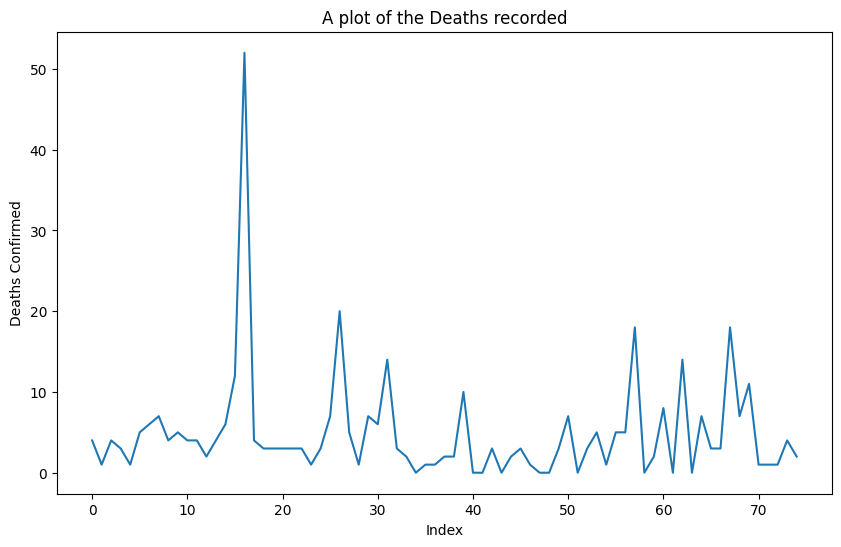

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df['Deaths_confirmed'])
plt.xlabel("Index")
plt.ylabel("Deaths Confirmed")
plt.title("A plot of the Deaths recorded")
plt.show()

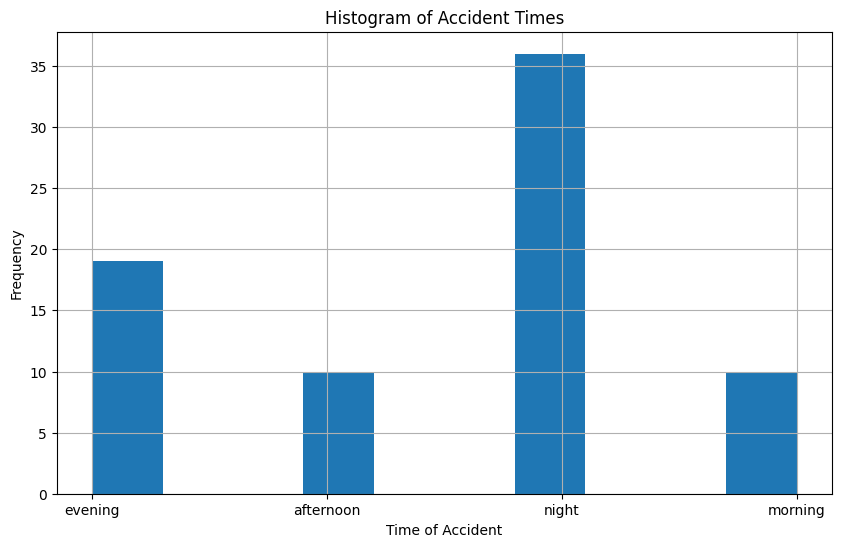

In [ ]:

plt.figure(figsize=(10, 6))
df['Accident_time'].hist(bins=10)
plt.title('Histogram of Accident Times')
plt.xlabel('Time of Accident')
plt.ylabel('Frequency')
plt.show()

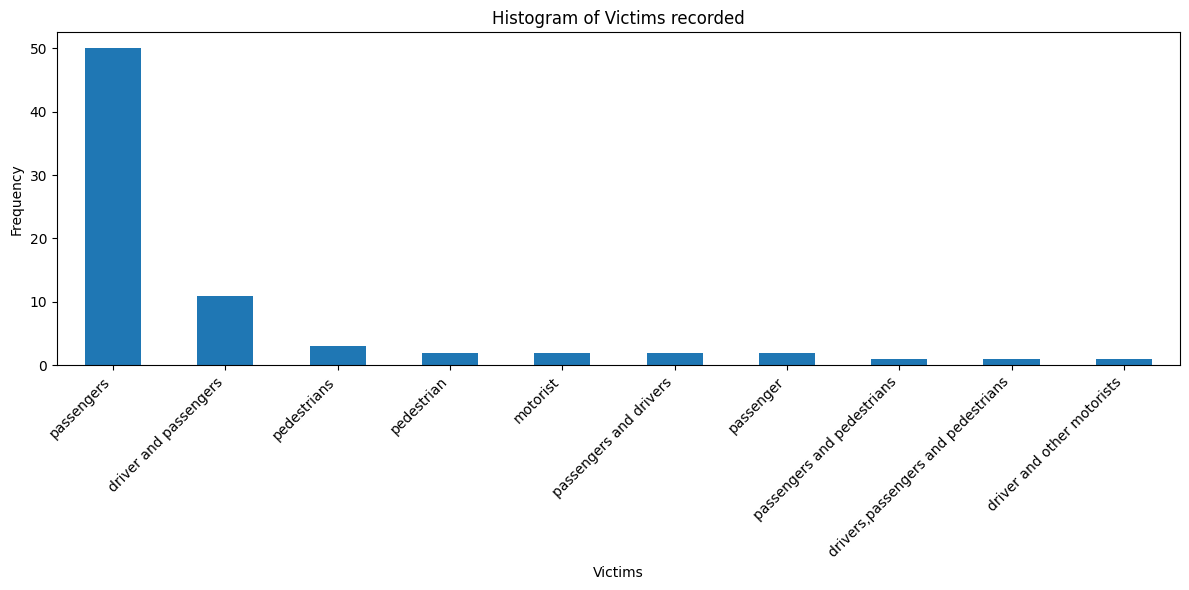

In [ ]:

victims = df['Victims'].value_counts()

plt.figure(figsize=(12, 6))
victims.plot(kind='bar')
plt.title('Histogram of Victims recorded')
plt.xlabel('Victims')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df['Victims'].unique()

array(['passengers', 'driver and passengers', 'pedestrian',
       'passengers and pedestrians', 'drivers,passengers and pedestrians',
       'motorist', 'passengers and drivers', 'passenger',
       'driver and other motorists', 'pedestrians'], dtype=object)

In [ ]:
len(df['Victims'].unique())

10

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy

,Date,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time
0,2023-08-08,Sobea,Sobea,Nakuru,nakuru-eldoret highway,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,maai-mahiu naivasha highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,narok mai mahiu road,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,narok mai mahiu road,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,kerugoya-karatina road,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,nairobi kakamega road,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,namanga road,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,naivasha nairobi highway,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,nakuru - nairobi highway,car rammed into a lorry,passengers,4,morning


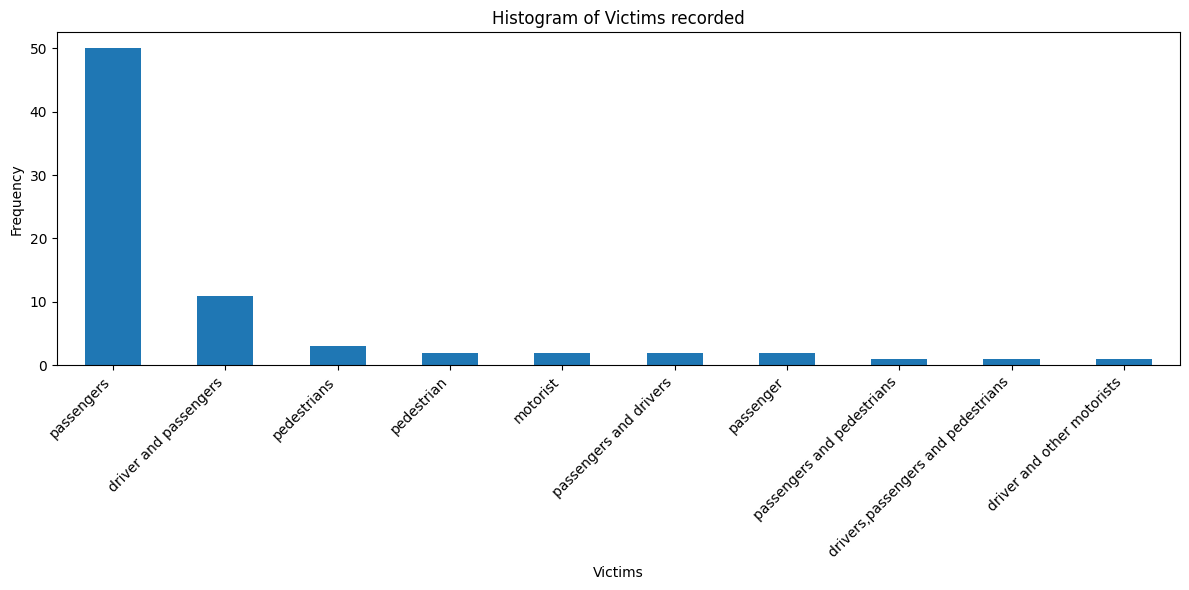

In [ ]:
victims = df_copy['Victims'].value_counts()

plt.figure(figsize=(12, 6))
victims.plot(kind='bar')
plt.title('Histogram of Victims recorded')
plt.xlabel('Victims')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

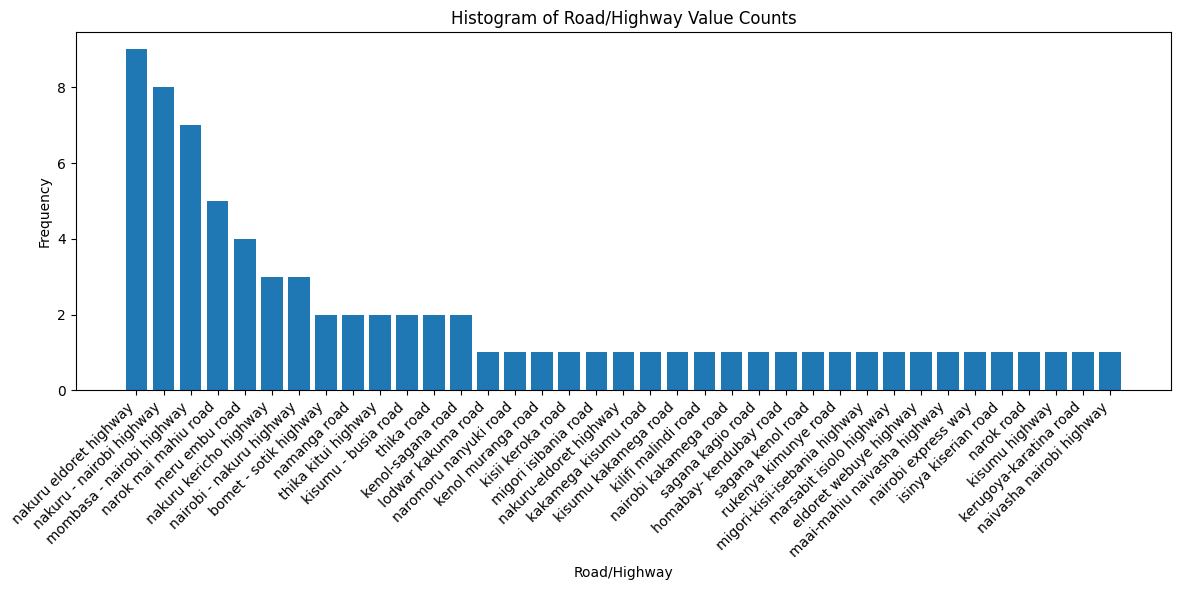

In [ ]:
# Value counts of 'Road/Highway'
road_counts = df_copy['Road/Highway'].value_counts()

# Create the histogram
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(road_counts.index, road_counts.values)
plt.xlabel('Road/Highway')
plt.ylabel('Frequency')
plt.title('Histogram of Road/Highway Value Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
len(df_copy['Road/Highway'].unique())

37

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              75 non-null     datetime64[ns]
 1   Accident_spot     75 non-null     object        
 2   Area              75 non-null     object        
 3   County            75 non-null     object        
 4   Road/Highway      75 non-null     object        
 5   Cause             75 non-null     object        
 6   Victims           75 non-null     object        
 7   Deaths_confirmed  75 non-null     Int64         
 8   Accident_time     75 non-null     object        
dtypes: Int64(1), datetime64[ns](1), object(7)
memory usage: 5.5+ KB


In [ ]:
df.describe()

,Date,Deaths_confirmed
count,75,75.0
mean,2023-01-23 17:36:00,4.88
min,2020-09-27 00:00:00,0.0
25%,2022-08-01 12:00:00,1.0
50%,2023-04-18 00:00:00,3.0
75%,2023-08-07 12:00:00,5.5
max,2023-09-27 00:00:00,52.0
std,NaN,7.005712


In [ ]:
df_copy.head(80)

,Date,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time
0,2023-08-08,Sobea,Sobea,Nakuru,nakuru-eldoret highway,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,maai-mahiu naivasha highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,narok mai mahiu road,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,narok mai mahiu road,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,kerugoya-karatina road,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,nairobi kakamega road,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,namanga road,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,naivasha nairobi highway,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,nakuru - nairobi highway,car rammed into a lorry,passengers,4,morning


The median of 'Deaths_confirmed' is: 3.0
The mean of 'Deaths_confirmed' is: 4.88


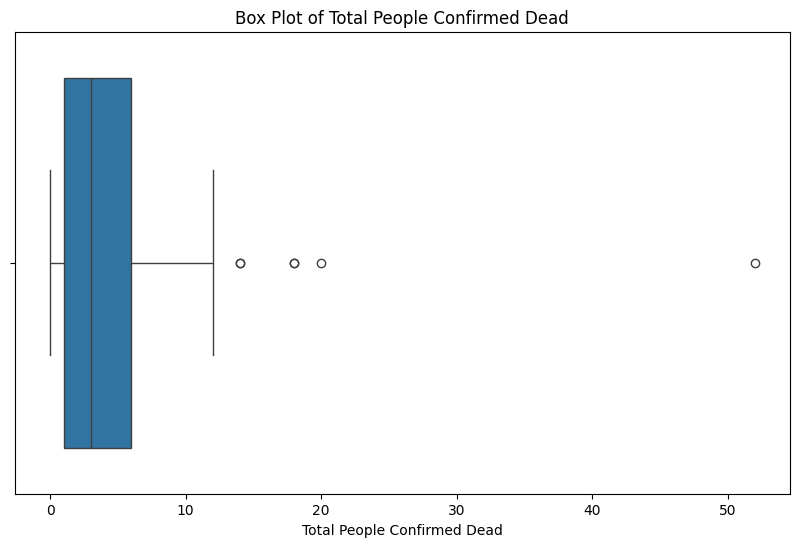

The upper bound is 13.5 and the lower bound is -6.5
Outliers:


,Total people confirmed dead
16,52.0
26,20.0
31,14.0
57,18.0
62,14.0
67,18.0


In [ ]:
median_deaths = df_copy['Deaths_confirmed'].median()
print(f"The median of 'Deaths_confirmed' is: {median_deaths}")


mean_deaths = df_copy['Deaths_confirmed'].mean()
print(f"The mean of 'Deaths_confirmed' is: {mean_deaths}")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Dead_people)
plt.title('Box Plot of Total People Confirmed Dead')
plt.xlabel('Total People Confirmed Dead')
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = Dead_people.quantile(0.25)
Q3 = Dead_people.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Dead_people[(Dead_people < lower_bound) | (Dead_people > upper_bound)]
print(f"The upper bound is {upper_bound} and the lower bound is {lower_bound}")
print("Outliers:")
outliers

In [ ]:
# Assuming df_copy is already created and contains the data
def determine_risky_level(row):
    if row['Victims'] in ['pedestrian', 'passenger', 'motorist']:
        return 'Low'
    elif 0 <= row['Deaths_confirmed'] <= 3 or (0 <= row['Deaths_confirmed'] <= 5 and row['Accident_time'] == 'night'):
        return 'Moderate'
    elif 4 <= row['Deaths_confirmed'] <= 13:
        return 'Moderately High'
    elif row['Deaths_confirmed'] > 13:
        return 'High'
    else:
        return 'Unknown'  # Default case, if any condition doesn't match

In [ ]:
# Apply the function to create the Risky_level column
df_copy['Risky_level'] = df_copy.apply(determine_risky_level, axis=1)

# Display the updated DataFrame
print(df_copy)

         Date Accident_spot      Area     County                 Road/Highway  \
0  2023-08-08         Sobea     Sobea     Nakuru       nakuru-eldoret highway   
1  2023-08-07    Maai-Mahiu  Naivasha     Nakuru  maai-mahiu naivasha highway   
2  2023-07-25       Ntulele   Ntulele      Narok         narok mai mahiu road   
3  2022-12-02         Suswa     Suswa      Narok         narok mai mahiu road   
4  2022-12-01        Mutira    Mutira  Kirinyaga       kerugoya-karatina road   
..        ...           ...       ...        ...                          ...   
70 2022-06-03     Losengeli   Sabatia     Vihiga        nairobi kakamega road   
71 2022-05-31        Isinya    Isinya    Kajiado                 namanga road   
72 2022-05-30        Kinugi    Kinugi     Nakuru     naivasha nairobi highway   
73 2022-02-28        Kinugi    Kinugi     Nakuru     nakuru - nairobi highway   
74 2023-08-08         Sobea     Sobea     Nakuru       nakuru eldoret highway   

                           

In [ ]:
df_copy['Risky_level'].unique()

array(['Moderately High', 'Moderate', 'Low', 'High'], dtype=object)

In [ ]:

unknown_risk_rows = df_copy[df_copy['Risky_level'] == 'Unknown']
unknown_risk_rows

,Date,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time,Risky_level


## Building the model

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


### Drop Unnecessary Columns and Encode Categorical Variables

#### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              75 non-null     datetime64[ns]
 1   Accident_spot     75 non-null     object        
 2   Area              75 non-null     object        
 3   County            75 non-null     object        
 4   Road/Highway      75 non-null     object        
 5   Cause             75 non-null     object        
 6   Victims           75 non-null     object        
 7   Deaths_confirmed  75 non-null     Int64         
 8   Accident_time     75 non-null     object        
 9   Risky_level       75 non-null     object        
dtypes: Int64(1), datetime64[ns](1), object(8)
memory usage: 6.1+ KB


In [ ]:
df_copy

,Date,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time,Risky_level
0,2023-08-08,Sobea,Sobea,Nakuru,nakuru-eldoret highway,head on collision,passengers,4,evening,Moderately High
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,maai-mahiu naivasha highway,vehicle and motorcycle collision,passengers,1,evening,Moderate
2,2023-07-25,Ntulele,Ntulele,Narok,narok mai mahiu road,head on collision,driver and passengers,4,evening,Moderately High
3,2022-12-02,Suswa,Suswa,Narok,narok mai mahiu road,head on collision,driver and passengers,3,evening,Moderate
4,2022-12-01,Mutira,Mutira,Kirinyaga,kerugoya-karatina road,run over,pedestrian,1,afternoon,Low
...,...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,nairobi kakamega road,bus lost control and rolled over,passengers,1,night,Moderate
71,2022-05-31,Isinya,Isinya,Kajiado,namanga road,car rammed into a trailer,passengers,1,night,Moderate
72,2022-05-30,Kinugi,Kinugi,Nakuru,naivasha nairobi highway,truck driver collided with an oncoming matatu,passengers,1,morning,Moderate
73,2022-02-28,Kinugi,Kinugi,Nakuru,nakuru - nairobi highway,car rammed into a lorry,passengers,4,morning,Moderately High


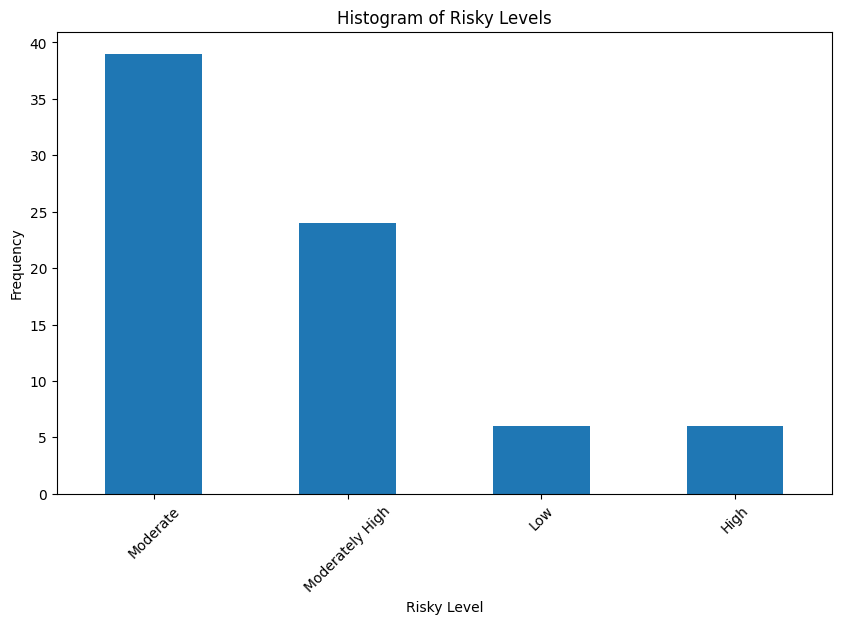

In [ ]:
plt.figure(figsize=(10, 6))
df_copy['Risky_level'].value_counts().plot(kind='bar')
plt.title('Histogram of Risky Levels')
plt.xlabel('Risky Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

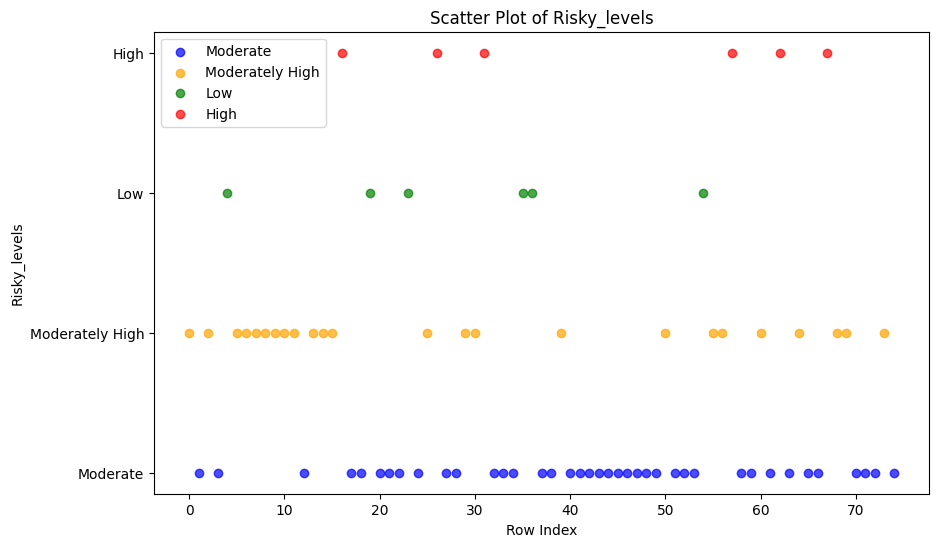

In [ ]:


plt.figure(figsize=(10, 6))
# Define colors for each category, explicitly including NaN
colors = {'Moderate': 'blue', 'Moderately High': 'orange', 'Low': 'green', 'High': 'red'}

# Iterate through categories and plot
for category, color in colors.items():
    # Handle NaN values correctly
    if category == 'nan':
        subset = df_copy[df_copy['Risky_level'].isnull()]
    else:
        subset = df_copy[df_copy['Risky_level'] == category]

    plt.scatter(subset.index, subset['Risky_level'], label=category, color=color, alpha=0.7)

plt.title('Scatter Plot of Risky_levels')
plt.xlabel('Row Index')
plt.ylabel('Risky_levels')
plt.legend()
plt.show()

In [ ]:

# Create the 'Danger_level' column based on 'Deaths_confirmed'
df_copy['Danger_level'] = 'Safe'  # Initialize with 'Safe'
df_copy.loc[ (df_copy['Deaths_confirmed'] > 0) & (df_copy['Deaths_confirmed'] <= 13), 'Danger_level'] = 'Dangerous'
df_copy.loc[df_copy['Deaths_confirmed'] > 13, 'Danger_level'] = 'Lethal'

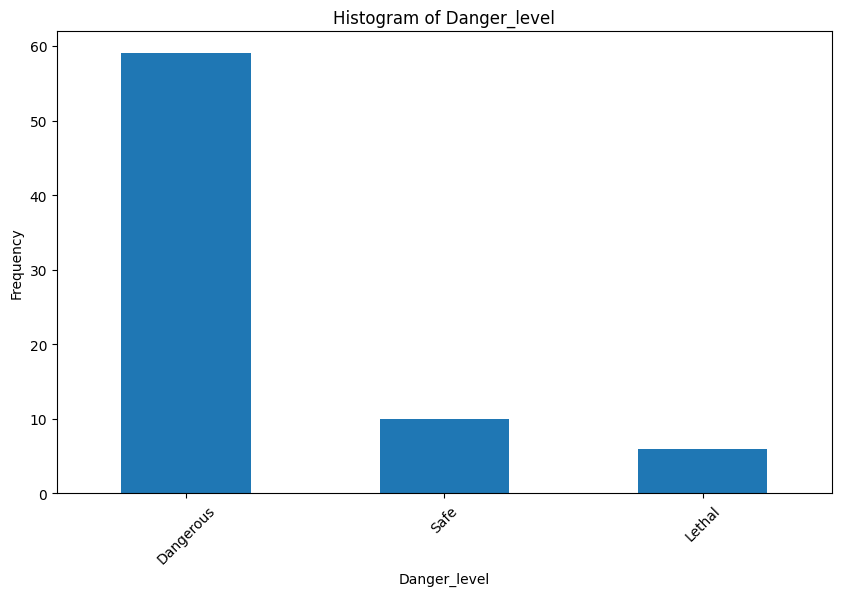

In [ ]:
plt.figure(figsize=(10, 6))
df_copy['Danger_level'].value_counts().plot(kind='bar')
plt.title('Histogram of Danger_level')
plt.xlabel('Danger_level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

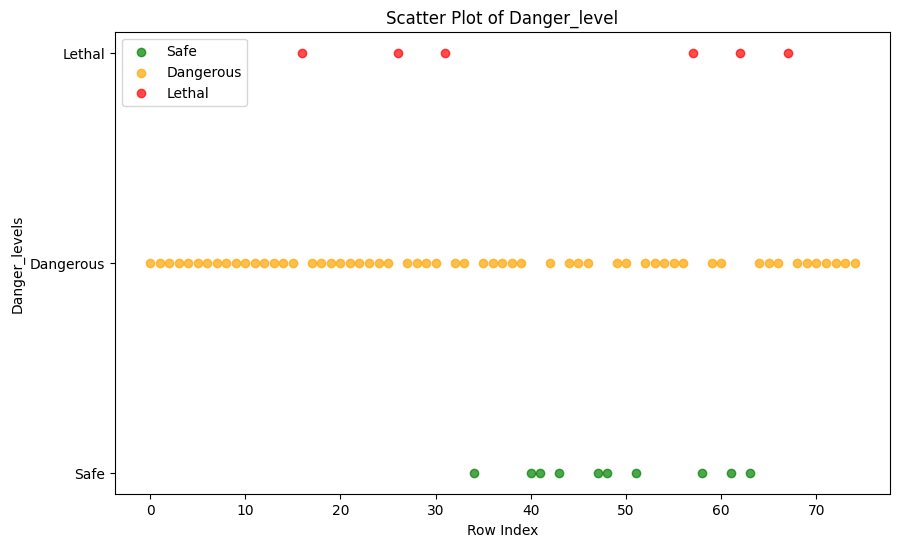

In [ ]:


plt.figure(figsize=(10, 6))
# Define colors for each category, explicitly including NaN
colors = {'Safe': 'green', 'Dangerous': 'orange', 'Lethal': 'red'}

# Iterate through categories and plot
for category, color in colors.items():
    # Handle NaN values correctly
    if category == 'nan':
        subset = df_copy[df_copy['Danger_level'].isnull()]
    else:
        subset = df_copy[df_copy['Danger_level'] == category]

    plt.scatter(subset.index, subset['Danger_level'], label=category, color=color, alpha=0.7)

plt.title('Scatter Plot of Danger_level')
plt.xlabel('Row Index')
plt.ylabel('Danger_levels')
plt.legend()
plt.show()

In Danger_levels we have one value really dominating the others unlike in Risky_levels leading to:

Class imbalance occurs when one class in a dataset has significantly more instances than the other(s). This is especially problematic in classification tasks because:

- Model Bias Toward the Majority Class: Most machine learning models optimize for overall accuracy. If the majority class dominates, the model may simply predict the majority class most of the time to achieve high accuracy, ignoring the minority class.
- Poor Performance on Minority Class: The minority class, often the class of interest, may be poorly predicted because the model receives too few examples to learn effectively.

In [ ]:

if 'Danger_level' in df_copy.columns:
    df_copy = df_copy.drop('Danger_level', axis=1)
    print("Column 'Danger_level' dropped successfully.")
else:
    print("Column 'Danger_level' not found in the DataFrame.")

Column 'Danger_level' dropped successfully.


In [ ]:
# Create a copy of df_copy for encoding
df_label_encoded = df_copy.copy()

# Apply label encoding to all columns except 'Risky_level'
label_encoder = LabelEncoder()
for column in df_label_encoded.columns:
    if column != 'Risky_level' and df_label_encoded[column].dtype == 'object':
        df_label_encoded[column] = label_encoder.fit_transform(df_label_encoded[column])

# Check the processed dataset
df_label_encoded.head()

,Date,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time,Risky_level
0,2023-08-08,51,53,18,27,24,5,4,1,Moderately High
1,2023-08-07,24,36,18,14,55,5,1,1,Moderate
2,2023-07-25,42,43,19,29,24,1,4,1,Moderately High
3,2022-12-02,53,55,19,29,24,1,3,1,Moderate
4,2022-12-01,36,34,7,7,47,8,1,0,Low


In [ ]:

df_label_encoded = df_label_encoded.drop('Date', axis=1)

In [ ]:
df_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Accident_spot     75 non-null     int64 
 1   Area              75 non-null     int64 
 2   County            75 non-null     int64 
 3   Road/Highway      75 non-null     int64 
 4   Cause             75 non-null     int64 
 5   Victims           75 non-null     int64 
 6   Deaths_confirmed  75 non-null     Int64 
 7   Accident_time     75 non-null     int64 
 8   Risky_level       75 non-null     object
dtypes: Int64(1), int64(7), object(1)
memory usage: 5.5+ KB


In [ ]:
df_label_encoded

,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time,Risky_level
0,51,53,18,27,24,5,4,1,Moderately High
1,24,36,18,14,55,5,1,1,Moderate
2,42,43,19,29,24,1,4,1,Moderately High
3,53,55,19,29,24,1,3,1,Moderate
4,36,34,7,7,47,8,1,0,Low
...,...,...,...,...,...,...,...,...,...
70,23,50,24,22,11,5,1,3,Moderate
71,8,8,3,28,17,5,1,3,Moderate
72,18,16,18,23,52,5,1,2,Moderate
73,18,16,18,24,16,5,4,2,Moderately High


In [ ]:
df_label_encoded['Risky_level'].unique()

array(['Moderately High', 'Moderate', 'Low', 'High'], dtype=object)

In [ ]:

# Rename the 'Risky_level' column to 'Danger_level'
df_label_encoded = df_label_encoded.rename(columns={'Risky_level': 'Danger_level'})

In [ ]:
# Create a copy of df_label_encoded
df_2 = df_label_encoded.copy()

# Apply label encoding to the 'Danger_level' column in the copy
label_encoder = LabelEncoder()
df_2['Danger_level'] = label_encoder.fit_transform(df_2['Danger_level'])

# Now df_2 contains the label-encoded 'Danger_level' column
# while df_label_encoded remains unchanged

In [ ]:
df_label_encoded

,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time,Danger_level
0,51,53,18,27,24,5,4,1,Moderately High
1,24,36,18,14,55,5,1,1,Moderate
2,42,43,19,29,24,1,4,1,Moderately High
3,53,55,19,29,24,1,3,1,Moderate
4,36,34,7,7,47,8,1,0,Low
...,...,...,...,...,...,...,...,...,...
70,23,50,24,22,11,5,1,3,Moderate
71,8,8,3,28,17,5,1,3,Moderate
72,18,16,18,23,52,5,1,2,Moderate
73,18,16,18,24,16,5,4,2,Moderately High


In [ ]:
df_model = df_label_encoded.copy()


In [ ]:
df_model.columns

Index(['Accident_spot', 'Area', 'County', 'Road/Highway', 'Cause', 'Victims',
       'Deaths_confirmed', 'Accident_time', 'Danger_level'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


### Prepare the data

In [ ]:
df_model['Danger_level'].unique()

array(['Moderately High', 'Moderate', 'Low', 'High'], dtype=object)

In [ ]:
df_model.columns

Index(['Accident_spot', 'Area', 'County', 'Road/Highway', 'Cause', 'Victims',
       'Deaths_confirmed', 'Accident_time', 'Danger_level'],
      dtype='object')

In [ ]:
# Drop specified columns and separate features and target
X = df_model.drop(['Accident_spot', 'Area', 'County', 'Road/Highway', 'Danger_level', 'Cause'], axis=1)
y = df_model['Danger_level']

# Stratified split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())


Training set class distribution:
Danger_level
Moderate           29
Moderately High    18
Low                 5
High                4
Name: count, dtype: int64

Testing set class distribution:
Danger_level
Moderate           10
Moderately High     6
High                2
Low                 1
Name: count, dtype: int64


In [ ]:
X

,Victims,Deaths_confirmed,Accident_time
0,5,4,1
1,5,1,1
2,1,4,1
3,1,3,1
4,8,1,0
...,...,...,...
70,5,1,3
71,5,1,3
72,5,1,2
73,5,4,2


In [ ]:
y

,Danger_level
0,Moderately High
1,Moderate
2,Moderately High
3,Moderate
4,Low
...,...
70,Moderate
71,Moderate
72,Moderate
73,Moderately High


### Define and Train Multiple Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and store predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)


### Tabulate Classification Metrics

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Initialize results dictionary
results = []

# Get the unique classes in y_test
unique_classes = sorted(y_test.unique())

# Calculate metrics for each model
for name, y_pred in predictions.items():
    # Generate the classification report as a dictionary
    report = classification_report(
        y_test, y_pred, labels=unique_classes, target_names=unique_classes, output_dict=True
    )

    # Calculate overall metrics using weighted average
    precision, recall, f1_score, support = precision_recall_fscore_support(
        y_test, y_pred, average='weighted', labels=unique_classes
    )

    # Add metrics to results
    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Accuracy': report['accuracy'],
        'Support': sum(report[str(label)]['support'] for label in unique_classes)  # Total support
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                 Model  Precision    Recall  F1-Score  Accuracy  Support
0        Random Forest   0.756664  0.842105  0.796800  0.842105     19.0
1                  SVM   0.807018  0.842105  0.811802  0.842105     19.0
2        Decision Tree   1.000000  1.000000  1.000000  1.000000     19.0
3                  KNN   0.807018  0.842105  0.811802  0.842105     19.0
4  Logistic Regression   0.899522  0.947368  0.922306  0.947368     19.0


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
from tabulate import tabulate

# Get the unique classes in y_test
unique_classes = sorted(y_test.unique())

# Function to create a formatted table for each model
def display_model_metrics(name, y_true, y_pred):
    report = classification_report(
        y_true, y_pred,
        labels=unique_classes,
        target_names=unique_classes,
        output_dict=True
    )

    # Create data for the table
    rows = []
    for class_label in unique_classes:
        class_metrics = report[str(class_label)]
        rows.append([
            class_label,
            f"{class_metrics['precision']:.3f}",
            f"{class_metrics['recall']:.3f}",
            f"{class_metrics['f1-score']:.3f}",
            f"{class_metrics['support']}"
        ])

    # Add average row
    rows.append([
        'Average/Total',
        f"{report['weighted avg']['precision']:.3f}",
        f"{report['weighted avg']['recall']:.3f}",
        f"{report['weighted avg']['f1-score']:.3f}",
        f"{report['weighted avg']['support']}"
    ])

    # Create and return the table
    table = tabulate(
        rows,
        headers=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'],
        tablefmt='grid'
    )
    return table, report['weighted avg']

# Store best metrics
best_metrics = {
    'precision': ('', 0),
    'recall': ('', 0),
    'f1-score': ('', 0)
}

# Display results for each model
print("\nDetailed Metrics for Each Model:\n")
for name, y_pred in predictions.items():
    print(f"\n{'-'*50}")
    print(f"{name} Metrics:")
    print(f"{'-'*50}")

    table, avg_metrics = display_model_metrics(name, y_test, y_pred)
    print(table)

    # Update best metrics
    if avg_metrics['precision'] > best_metrics['precision'][1]:
        best_metrics['precision'] = (name, avg_metrics['precision'])
    if avg_metrics['recall'] > best_metrics['recall'][1]:
        best_metrics['recall'] = (name, avg_metrics['recall'])
    if avg_metrics['f1-score'] > best_metrics['f1-score'][1]:
        best_metrics['f1-score'] = (name, avg_metrics['f1-score'])

# Display best models
print("\nBest Models:")
print("-" * 50)
for metric, (model, score) in best_metrics.items():
    print(f"Best {metric}: {model} (Score: {score:.3f})")


Detailed Metrics for Each Model:


--------------------------------------------------
Random Forest Metrics:
--------------------------------------------------
+-----------------+-------------+----------+------------+-----------+
| Class           |   Precision |   Recall |   F1-Score |   Support |
+=================+=============+==========+============+===========+
| High            |       0     |    0     |      0     |         2 |
+-----------------+-------------+----------+------------+-----------+
| Low             |       1     |    1     |      1     |         1 |
+-----------------+-------------+----------+------------+-----------+
| Moderate        |       0.909 |    1     |      0.952 |        10 |
+-----------------+-------------+----------+------------+-----------+
| Moderately High |       0.714 |    0.833 |      0.769 |         6 |
+-----------------+-------------+----------+------------+-----------+
| Average/Total   |       0.757 |    0.842 |      0.797 |        19 |

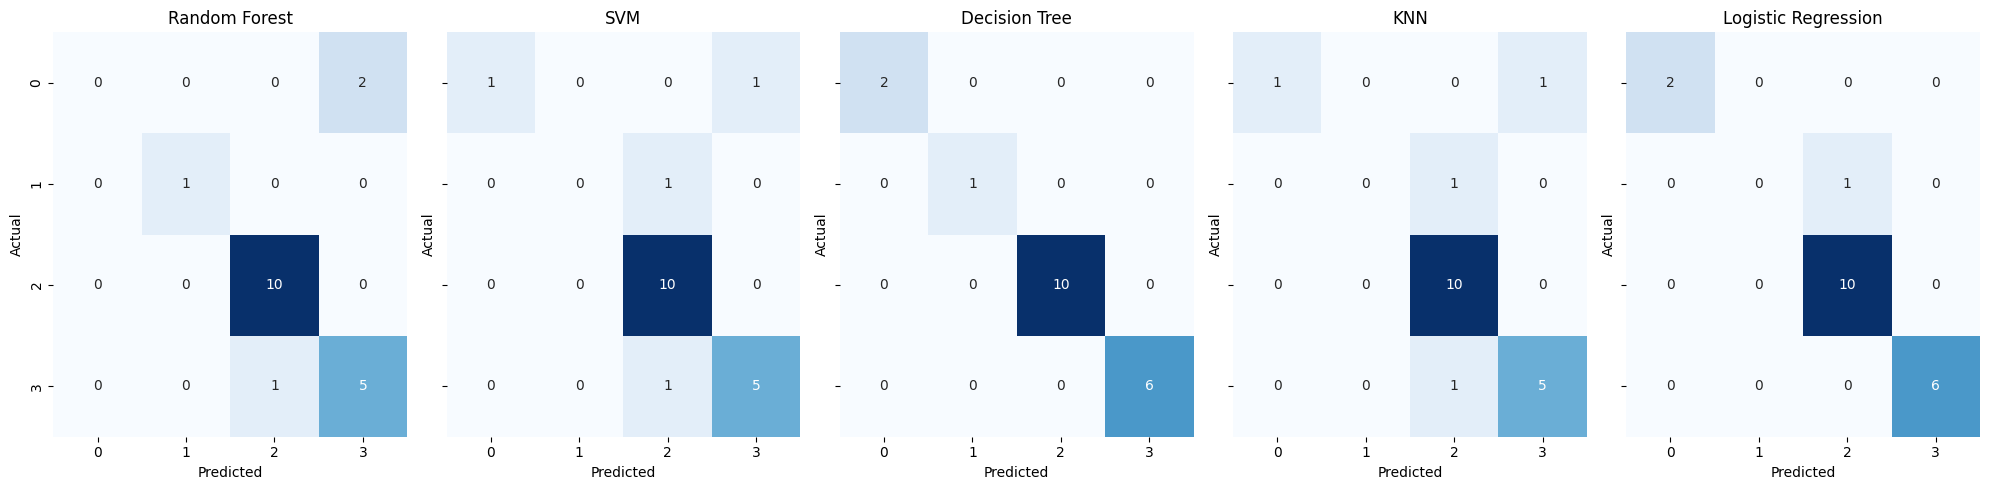

In [ ]:
fig, axes = plt.subplots(1, len(models), figsize=(20, 5), sharey=True)

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], cbar=False)
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("Best Model:")
print(best_model)


Best Model:
Model        Decision Tree
Precision              1.0
Recall                 1.0
F1-Score               1.0
Accuracy               1.0
Support               19.0
Name: 2, dtype: object


In [ ]:
df_model

,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time,Danger_level
0,51,53,18,27,24,5,4,1,Moderately High
1,24,36,18,14,55,5,1,1,Moderate
2,42,43,19,29,24,1,4,1,Moderately High
3,53,55,19,29,24,1,3,1,Moderate
4,36,34,7,7,47,8,1,0,Low
...,...,...,...,...,...,...,...,...,...
70,23,50,24,22,11,5,1,3,Moderate
71,8,8,3,28,17,5,1,3,Moderate
72,18,16,18,23,52,5,1,2,Moderate
73,18,16,18,24,16,5,4,2,Moderately High


In [ ]:
df

,Date,Accident_spot,Area,County,Road/Highway,Cause,Victims,Deaths_confirmed,Accident_time
0,2023-08-08,Sobea,Sobea,Nakuru,nakuru-eldoret highway,head on collision,passengers,4,evening
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,maai-mahiu naivasha highway,vehicle and motorcycle collision,passengers,1,evening
2,2023-07-25,Ntulele,Ntulele,Narok,narok mai mahiu road,head on collision,driver and passengers,4,evening
3,2022-12-02,Suswa,Suswa,Narok,narok mai mahiu road,head on collision,driver and passengers,3,evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,kerugoya-karatina road,run over,pedestrian,1,afternoon
...,...,...,...,...,...,...,...,...,...
70,2022-06-03,Losengeli,Sabatia,Vihiga,nairobi kakamega road,bus lost control and rolled over,passengers,1,night
71,2022-05-31,Isinya,Isinya,Kajiado,namanga road,car rammed into a trailer,passengers,1,night
72,2022-05-30,Kinugi,Kinugi,Nakuru,naivasha nairobi highway,truck driver collided with an oncoming matatu,passengers,1,morning
73,2022-02-28,Kinugi,Kinugi,Nakuru,nakuru - nairobi highway,car rammed into a lorry,passengers,4,morning


### ROC Curve and AUC for Best Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [ ]:
# Initialize selected models
selected_models = {
    # 'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, multi_class='ovr')
}

# Train models and store predictions with probabilities
y_scores = {}
for name, model in selected_models.items():
    model.fit(X_train, y_train)
    # Get probability estimates
    if hasattr(model, "predict_proba"):
        y_scores[name] = model.predict_proba(X_test)
    else:
        y_scores[name] = model.decision_function(X_test)

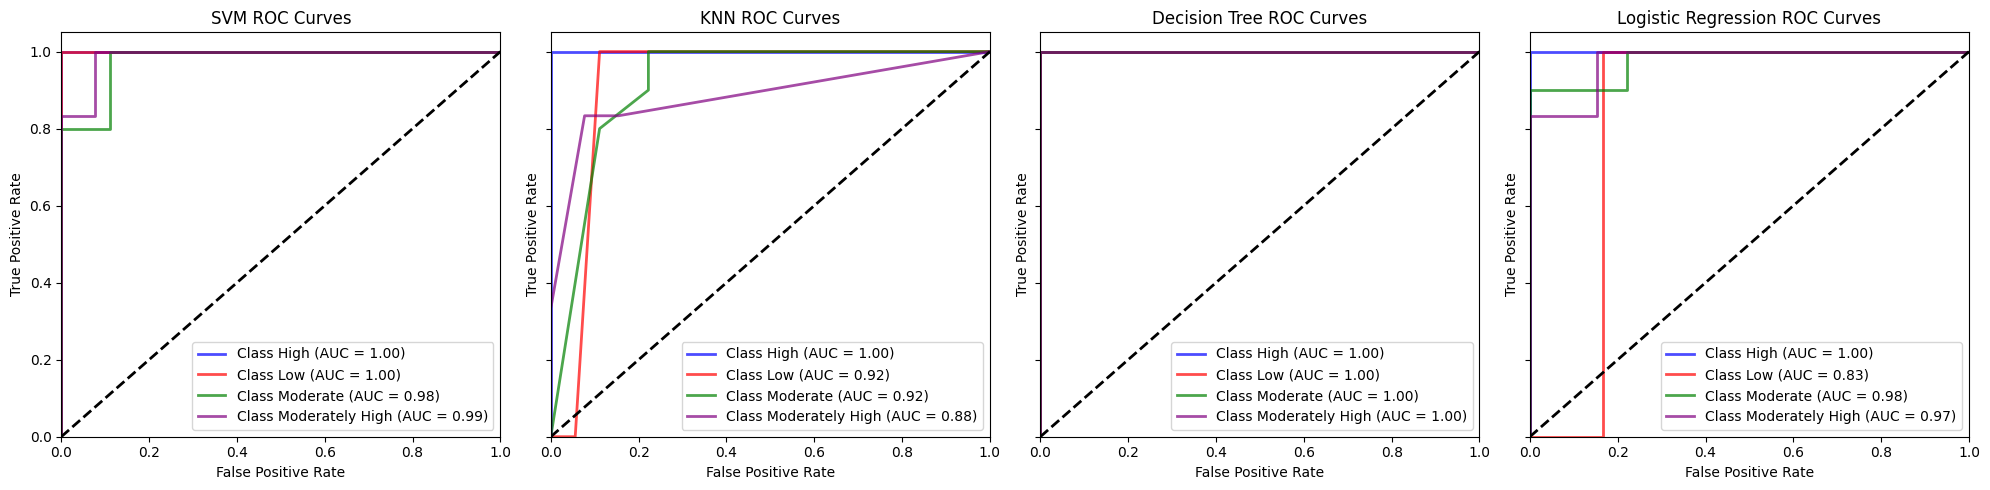

In [ ]:
# Binarize the output for multi-class ROC
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = len(classes)

# Create subplots for each model
fig, axes = plt.subplots(1, len(selected_models), figsize=(20, 5), sharey=True)

colors = ['blue', 'red', 'green', 'purple']  # Define consistent colors for each model

# Loop through each model and plot its ROC curves in a separate subplot
for idx, (model_name, ax) in enumerate(zip(selected_models.keys(), axes)):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[model_name][:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for the current model
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], color=colors[i], lw=2, alpha=0.7,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{model_name} ROC Curves')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


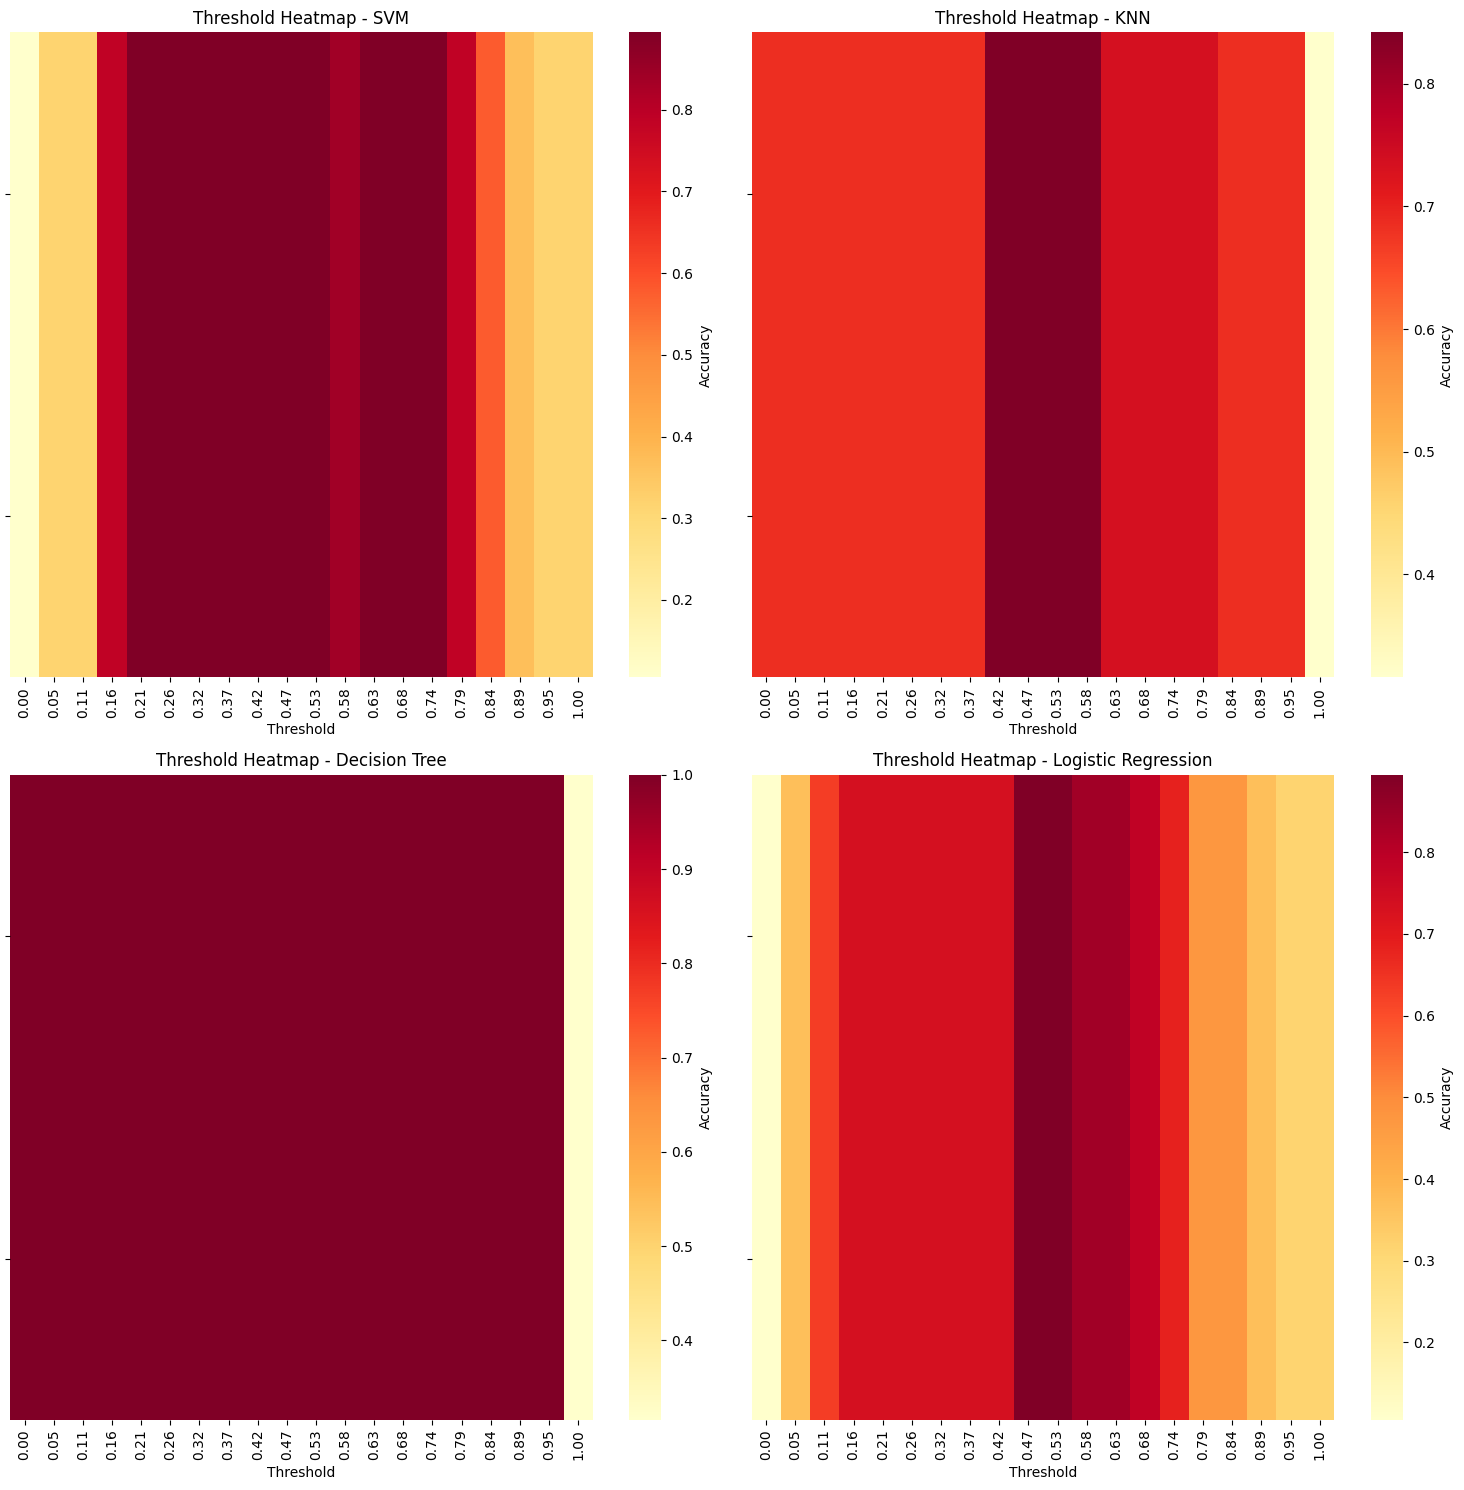

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create threshold heatmaps for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, (model_name, y_score) in enumerate(y_scores.items()):
    threshold_scores = []
    thresholds = np.linspace(0, 1, 20)

    for threshold in thresholds:
        class_predictions = []
        for prob in y_score:
            pred_class = classes[np.where(prob > threshold)[0][0]] if any(prob > threshold) else classes[-1]
            class_predictions.append(pred_class)

        # Calculate accuracy for this threshold
        accuracy = np.mean(np.array(class_predictions) == y_test)
        threshold_scores.append(accuracy)

    # Create heatmap
    threshold_matrix = np.tile(threshold_scores, (2, 1))
    sns.heatmap(threshold_matrix, ax=axes[idx], cmap='YlOrRd',
                xticklabels=[f'{t:.2f}' for t in thresholds],
                yticklabels=['', ''],
                cbar_kws={'label': 'Accuracy'})
    axes[idx].set_title(f'Threshold Heatmap - {model_name}')
    axes[idx].set_xlabel('Threshold')

plt.tight_layout()
plt.show()
plt.savefig('threshold_heatmaps.png')

**Decision Tree** is the one with most stable accuracies for all thresholds

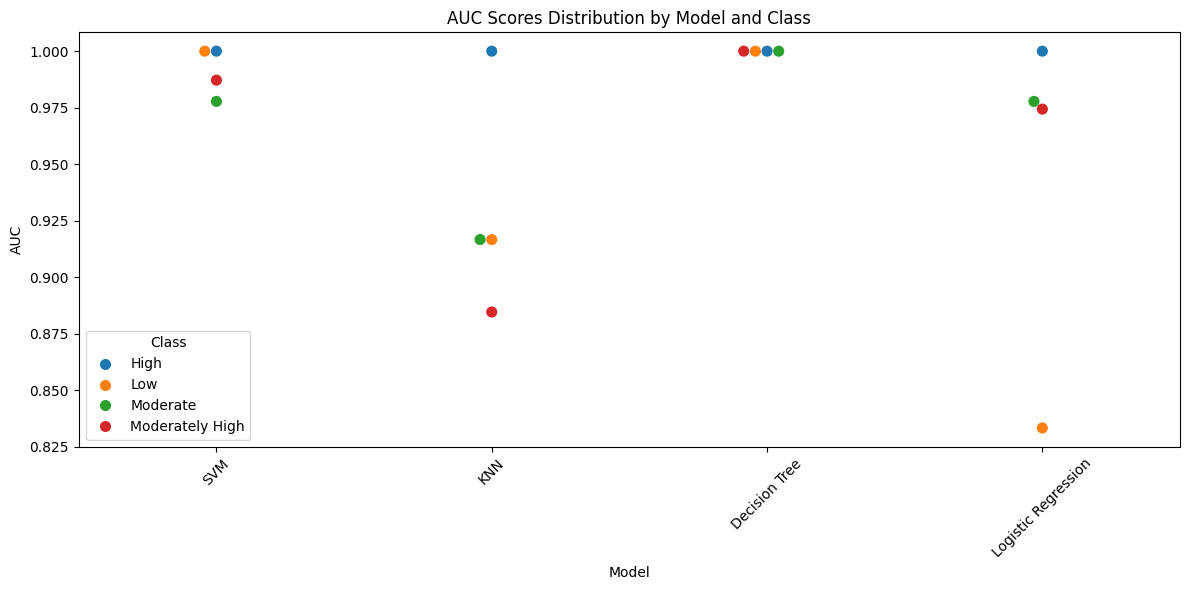


Average AUC scores for each model:
Model
Decision Tree          1.000000
SVM                    0.991239
Logistic Regression    0.946368
KNN                    0.929487
Name: AUC, dtype: float64


In [ ]:
# Calculate AUC scores for each model and class
auc_scores = []
for model_name in selected_models.keys():
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[model_name][:, i])
        auc_score = auc(fpr, tpr)
        auc_scores.append({
            'Model': model_name,
            'Class': classes[i],
            'AUC': auc_score
        })

# Create DataFrame for plotting
auc_df = pd.DataFrame(auc_scores)

# Create swarmplot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=auc_df, x='Model', y='AUC', hue='Class', size=8)
plt.xticks(rotation=45)
plt.title('AUC Scores Distribution by Model and Class')
plt.tight_layout()
plt.show()

# Print average AUC scores for each model
print("\nAverage AUC scores for each model:")
print(auc_df.groupby('Model')['AUC'].mean().sort_values(ascending=False))

**Therefore decided to go with decision tree**

In [ ]:
victims_str

array(['passengers', 'driver and passengers', 'pedestrian',
       'passengers and pedestrians', 'drivers,passengers and pedestrians',
       'motorist', 'passengers and drivers', 'passenger', nan,
       'driver and other motorists', 'pedestrians'], dtype=object)

In [ ]:

victims_str = [value for value in victims_str if not pd.isna(value) and value != 'nan']

In [ ]:
len(victims_str)

10

In [ ]:
victims_str

['passengers',
 'driver and passengers',
 'pedestrian',
 'passengers and pedestrians',
 'drivers,passengers and pedestrians',
 'motorist',
 'passengers and drivers',
 'passenger',
 'driver and other motorists',
 'pedestrians']

In [ ]:
df_model['Victims'].unique()

array([5, 1, 8, 7, 2, 3, 6, 4, 0, 9])

In [ ]:
df['Accident_time'].unique()

array(['evening', 'afternoon', 'night', 'morning'], dtype=object)

In [ ]:
df_model['Accident_time'].unique()

array([1, 0, 3, 2])

### Building the using the best model: Decision Tree

In [ ]:
# Features and target
X = df_model[['Victims', 'Deaths_confirmed', 'Accident_time']]
y = df_model['Danger_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
X

,Victims,Deaths_confirmed,Accident_time
0,5,4,1
1,5,1,1
2,1,4,1
3,1,3,1
4,8,1,0
...,...,...,...
70,5,1,3
71,5,1,3
72,5,1,2
73,5,4,2


In [ ]:
y

,Danger_level
0,Moderately High
1,Moderate
2,Moderately High
3,Moderate
4,Low
...,...
70,Moderate
71,Moderate
72,Moderate
73,Moderately High


In [ ]:
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())


Training set class distribution:
Danger_level
Moderate           29
Moderately High    18
Low                 5
High                4
Name: count, dtype: int64

Testing set class distribution:
Danger_level
Moderate           10
Moderately High     6
High                2
Low                 1
Name: count, dtype: int64


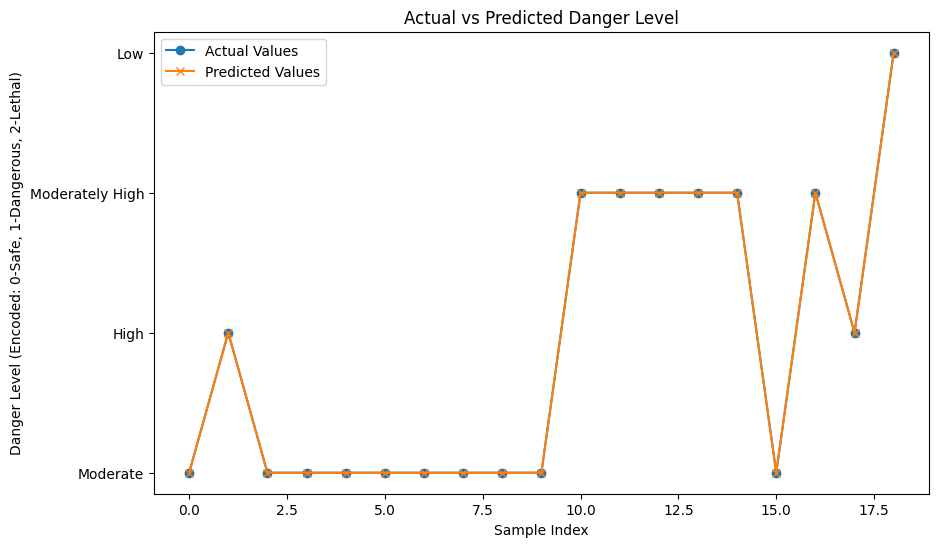

In [ ]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted Values', marker='x')
plt.title("Actual vs Predicted Danger Level")
plt.xlabel("Sample Index")
plt.ylabel("Danger Level (Encoded: 0-Safe, 1-Dangerous, 2-Lethal)")
plt.legend()
plt.show()

                 precision    recall  f1-score   support

           High       1.00      1.00      1.00         2
            Low       1.00      1.00      1.00         1
       Moderate       1.00      1.00      1.00        10
Moderately High       1.00      1.00      1.00         6

       accuracy                           1.00        19
      macro avg       1.00      1.00      1.00        19
   weighted avg       1.00      1.00      1.00        19



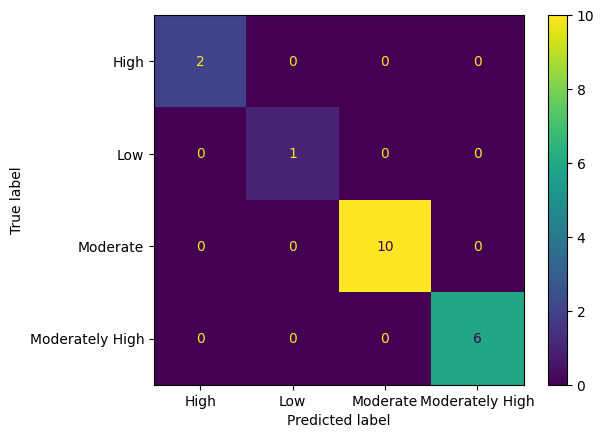

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Display metrics
print(classification_report(y_test, y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

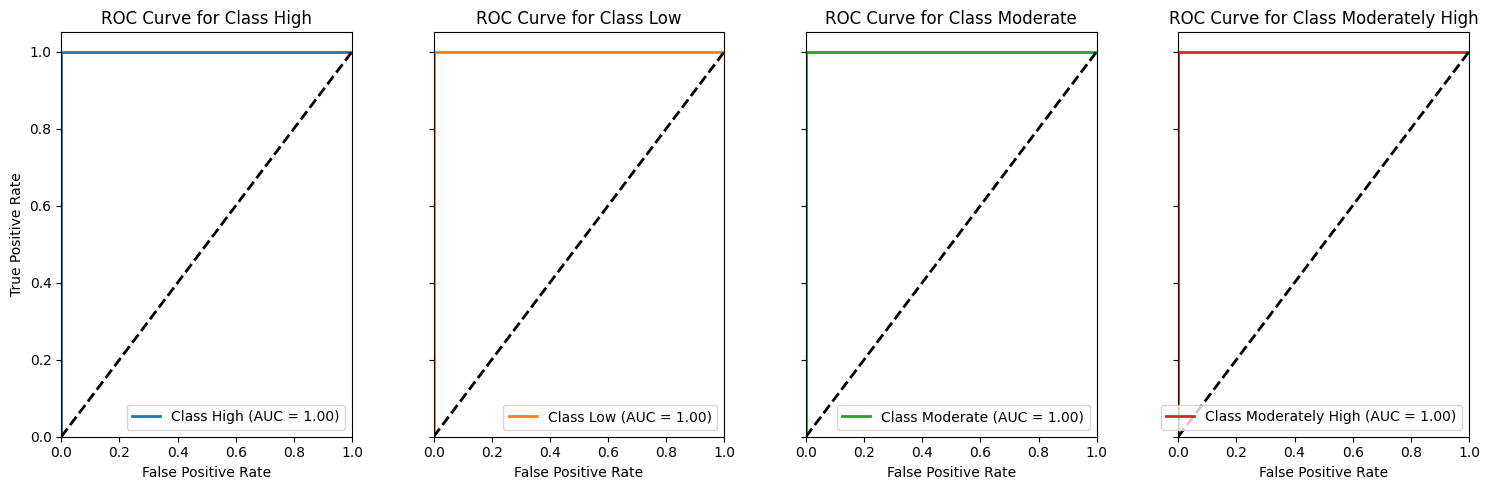

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

# Binarize the output for multi-class ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)  # Binarize y_test for multi-class ROC
n_classes = len(classes)

# Get decision scores or probabilities
y_scores = clf.predict_proba(X_test)  # Obtain probabilities for each class

# Initialize dictionaries to store metrics
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create subplots for each class
fig, axes = plt.subplots(1, n_classes, figsize=(15, 5), sharey=True)

# Use a colormap to generate distinct colors
cmap = get_cmap('tab10')

# Plot ROC curves for each class in separate subplots
for i, ax in enumerate(axes):
    ax.plot(fpr[i], tpr[i], color=cmap(i), lw=2,
            label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'ROC Curve for Class {classes[i]}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate' if i == 0 else '')
    ax.legend(loc="lower right")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Testing the Model

In [ ]:
# Function to get user input and classify with error handling
def classify_danger():
    print("Enter the following information to classify the road:")

    while True:
        try:
            # User input
            victim_input = int(input('''
            Enter Victim category:
            \nVictim Categories:
            0: driver and other motorists
            1: driver and passengers
            2: drivers, passengers and pedestrians
            3: motorist
            4: passenger
            5: passengers
            6: passengers and drivers
            7: passengers and pedestrians
            8: pedestrian
            9: pedestrians
            '''))

            if victim_input not in range(10):
                raise ValueError("Invalid victim category. Please enter a number between 0 and 9.")

            deaths_input = int(input("Enter number of deaths confirmed: "))
            if deaths_input < 0:
                raise ValueError("Number of deaths cannot be negative.")

            accident_time_input = int(input('''
            Enter Accident time:
            \nAccident Time Categories:
            0: afternoon
            1: evening
            2: morning
            3: night
            '''))

            if accident_time_input not in range(4):
                raise ValueError("Invalid accident time category. Please enter a number between 0 and 3.")

            # Error handling for specific victim categories
            if victim_input in [3, 4, 8] and deaths_input > 1:
                raise ValueError("For singular victims, the number of deaths cannot exceed 1.")

            # Prepare input for the model
            user_input = np.array([[victim_input, deaths_input, accident_time_input]])
            prediction = clf.predict(user_input)[0]

            print(f"\nThe road is classified as: {prediction}")
            break

        except ValueError as e:
            print(f"Error: {e}. Please try again.")


In [ ]:
classify_danger()

Enter the following information to classify the road:

            Enter Victim category:
            
Victim Categories:
            0: driver and other motorists
            1: driver and passengers
            2: drivers, passengers and pedestrians
            3: motorist
            4: passenger
            5: passengers
            6: passengers and drivers
            7: passengers and pedestrians
            8: pedestrian
            9: pedestrians
            9
Enter number of deaths confirmed: 14

            Enter Accident time:
            
Accident Time Categories:
            0: afternoon
            1: evening
            2: morning
            3: night
            3

The road is classified as: High


In [ ]:
classify_danger()

Enter the following information to classify the road:

            Enter Victim category:
            
Victim Categories:
            0: driver and other motorists
            1: driver and passengers
            2: drivers, passengers and pedestrians
            3: motorist
            4: passenger
            5: passengers
            6: passengers and drivers
            7: passengers and pedestrians
            8: pedestrian
            9: pedestrians
            7
Enter number of deaths confirmed: 3

            Enter Accident time:
            
Accident Time Categories:
            0: afternoon
            1: evening
            2: morning
            3: night
            0

The road is classified as: Moderate


In [ ]:
classify_danger()

Enter the following information to classify the road:

            Enter Victim category:
            
Victim Categories:
            0: driver and other motorists
            1: driver and passengers
            2: drivers, passengers and pedestrians
            3: motorist
            4: passenger
            5: passengers
            6: passengers and drivers
            7: passengers and pedestrians
            8: pedestrian
            9: pedestrians
            9
Enter number of deaths confirmed: 5

            Enter Accident time:
            
Accident Time Categories:
            0: afternoon
            1: evening
            2: morning
            3: night
            3

The road is classified as: Moderate


In [ ]:
classify_danger()

Enter the following information to classify the road:

            Enter Victim category:
            
Victim Categories:
            0: driver and other motorists
            1: driver and passengers
            2: drivers, passengers and pedestrians
            3: motorist
            4: passenger
            5: passengers
            6: passengers and drivers
            7: passengers and pedestrians
            8: pedestrian
            9: pedestrians
            3
Enter number of deaths confirmed: 0

            Enter Accident time:
            
Accident Time Categories:
            0: afternoon
            1: evening
            2: morning
            3: night
            2

The road is classified as: Low


## Export the Model

In [ ]:
import joblib

# Exporting the trained decision tree model
joblib.dump(clf, 'road_risk_model.pkl')


['road_risk_model.pkl']

### Header